# Data: Fairfax County Fire and Rescue Department call data and patient demographics 
Team: Fairfax Consultants

In [1]:
print("Hello Fairfax Consultants, Welcome Aboard")
#pip install nbconvert #or conda install nbconvert  #to save the notebook as .pdf
#nbconvert[webpdf]
#pip install pyppeteer
#https://github.com/jgm/pandoc/releases/tag/2.18

Hello Fairfax Consultants, Welcome Aboard


In [2]:
#Check the version
!jupyter --version
!python --version

Selected Jupyter core packages...
IPython          : 8.3.0
ipykernel        : 6.9.1
ipywidgets       : 7.6.5
jupyter_client   : 7.2.2
jupyter_core     : 4.10.0
jupyter_server   : 1.17.1
jupyterlab       : 3.3.2
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.3.0
notebook         : 6.4.11
qtconsole        : 5.3.1
traitlets        : 5.1.1
Python 3.8.11


In [3]:
#Import libraries
import os

import pandas as pd
#pd.set_option('display.max_rows', None)

import numpy as np
import math
#Import Viz libraries


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Altair can be installed, along with the example datasets in vega_datasets, using:$ pip install altair vega_datasets
#https://altair-viz.github.io/gallery/index.html

import altair as alt #pip install altair (from anaconda Powershell)
from vega_datasets import data # pip install vega_datasets/ #Only to use data from vegas data sets or else can be ignored

#To avoid MaxRowsError: in big data sets with altair
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('json')
#pip install altair_data_server
#alt.data_transformers.enable('data_server')
# Optional in Jupyter Notebook: requires an up-to-date vega nbextension.
#alt.renderers.enable('notebook') #$ pip install vega #https://altair-viz.github.io/user_guide/display_frontends.html

#pip install altair_viewer
#alt.renderers.enable('altair_viewer') 
#pip install altair_saver #to save interactive charts with interactive elements

#alt.renderers.enable('svg') #renders the chart as a static svg image within a Jupyter notebook.
#chart.save('chart.html', embed_options={'renderer':'svg'}) #o change to svg rendering, use the embed_options as such

DataTransformerRegistry.enable('json')

In [4]:
#Import all sheet by index
# # Set current working directory
# os.chdir("C:\\Users\\matth\\OneDrive\\Documents\\GMU\\DAEN 690\\Sponsor Files")
#df = pd.read_excel("E:\DAEN_690\Data\RawData_GMU_Summer2022.xlsx", sheet_name = None)#[0,1,2,3])

df = pd.read_excel("E:\DAEN_690\Data\RawData_GMU_Summer2022_SecondaryImpression.xlsx", sheet_name = None)#[0,1,2,3])

# # reading csv file and at a same time using converters attribute which will remove extra space
# df = pd.read_csv('\\student_data.csv', converters={'Name': str.strip(),
#                                                 'Blood Group' : str.strip(),
#                                                 'Gender' : str.strip() } )

#df = pd.read_excel("E:\DAEN_690\Data\Copy of RawData_GMU_Summer2022_SecondaryImpression.xlsx", sheet_name = None)#[0,1,2,3]) #in laptop
#df = pd.read_excel("E:\DAEN_690\Data\Copy of RawData_GMU_Summer2022.xlsx", sheet_name = None)#[0,1,2,3]) #in laptop
#pd.ExcelFile()
print(df)

{'Patient Demographics':         Patient_ID_Internal   PatientRace     PatientEthnicity  \
0                   1014525  HI Native/PI  Non-Hispanic/Latino   
1                   1625597         Asian  Non-Hispanic/Latino   
2                    818385         White  Non-Hispanic/Latino   
3                   1726959      Black/AA  Non-Hispanic/Latino   
4                   1319018         White  Non-Hispanic/Latino   
...                     ...           ...                  ...   
186860              1627319         Asian  Non-Hispanic/Latino   
186861              1016261      Black/AA  Non-Hispanic/Latino   
186862              1226587         White  Non-Hispanic/Latino   
186863              1326193         White  Non-Hispanic/Latino   
186864              1201794         White  Non-Hispanic/Latino   

                         Patient_Race_List_Raw PatientSex PatientGender  \
0       Native Hawaiian/Other Pacific Islander     Female        Female   
1                               

In [5]:
#Imported as Dictionary, view keys or values
print(df.keys())
print(df.values())
print(df['Patient Demographics']) #view 

dict_keys(['Patient Demographics', 'sepsis', 'STEMI', 'stroke'])
dict_values([        Patient_ID_Internal   PatientRace     PatientEthnicity  \
0                   1014525  HI Native/PI  Non-Hispanic/Latino   
1                   1625597         Asian  Non-Hispanic/Latino   
2                    818385         White  Non-Hispanic/Latino   
3                   1726959      Black/AA  Non-Hispanic/Latino   
4                   1319018         White  Non-Hispanic/Latino   
...                     ...           ...                  ...   
186860              1627319         Asian  Non-Hispanic/Latino   
186861              1016261      Black/AA  Non-Hispanic/Latino   
186862              1226587         White  Non-Hispanic/Latino   
186863              1326193         White  Non-Hispanic/Latino   
186864              1201794         White  Non-Hispanic/Latino   

                         Patient_Race_List_Raw PatientSex PatientGender  \
0       Native Hawaiian/Other Pacific Islander     Fem

In [6]:
#convert Dicationary to Data Frames
PatDemo = pd.DataFrame(df['Patient Demographics'])
SEPSIS = pd.DataFrame(df['sepsis'])
STEMI = pd.DataFrame(df['STEMI'])
STROKE = pd.DataFrame(df['stroke'])

#View Headings
print("\n PatDemo:\n",PatDemo.head(1))
print("\n SEPSIS:\n",SEPSIS.head(1))
print("\n STEMI:\n",STEMI.head(1))
print("\n STROKE:\n",STROKE.head(1))


 PatDemo:
    Patient_ID_Internal   PatientRace     PatientEthnicity  \
0              1014525  HI Native/PI  Non-Hispanic/Latino   

                    Patient_Race_List_Raw PatientSex PatientGender  \
0  Native Hawaiian/Other Pacific Islander     Female        Female   

  Patient_Gender_Raw  IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA  
0             Female                  0            0          50-59  

 SEPSIS:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   

  EmergencyDepartmentDiagnosis  \
0                          NaN   

                                   HospitalDiagnosi

In [7]:
#View Columns for each data frame

print("\n PatDemo:\n",PatDemo.columns)
print("\n SEPSIS:\n",SEPSIS.columns )
print("\n STEMI:\n",STEMI.columns )
print("\n STROKE:\n",STROKE.columns)


 PatDemo:
 Index(['Patient_ID_Internal', 'PatientRace', 'PatientEthnicity',
       'Patient_Race_List_Raw', 'PatientSex', 'PatientGender',
       'Patient_Gender_Raw', 'IsJuvenileUnder18', 'IsSenior65+',
       'AgeGroup_HIPAA'],
      dtype='object')

 SEPSIS:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'SepsisStatus', 'qSOFA',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis'],
      dtype='object')

 STEMI:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'STEMIstatus', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis'],
      dtype='object')

 STROKE:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'StrokeStatus', 'Speech', 'FacialDroop',
       'PronatorArmDrift', 'LargeV

Patient_ID_Internal         0
PatientRace              5782
PatientEthnicity         5782
Patient_Race_List_Raw    5782
PatientSex               5780
PatientGender            5780
Patient_Gender_Raw       5780
IsJuvenileUnder18           0
IsSenior65+                 0
AgeGroup_HIPAA           5786
dtype: int64


<AxesSubplot:>

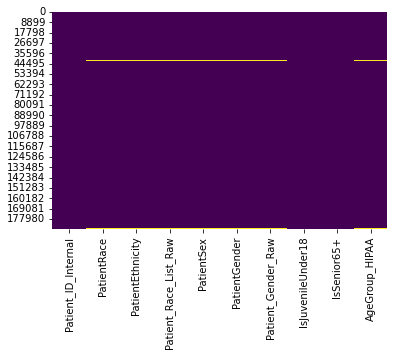

In [8]:
#Count Nulls
print(PatDemo.isnull().sum())
#With the help of heatmap, we can see the amount of data that is missing from the attribute
sns.heatmap(PatDemo.isnull(),cbar=False,cmap='viridis')

In [9]:
#Check if any columns or values are duplicated.

print("\n If any column header redundant?:",PatDemo.columns.duplicated())
print("\n Sex & Gender Duplicated?   : ",PatDemo['PatientSex'].equals(PatDemo['PatientGender']))
print("\n Race Duplicated?           : ",PatDemo['Patient_Race_List_Raw'].equals(PatDemo['PatientRace']))
print("\n Gender and GRaw Duplicated?: ",PatDemo['Patient_Gender_Raw'].equals(PatDemo['PatientGender']))
print("\n unique values in PatientGender column :\n",PatDemo['PatientGender'].unique())
print("\n unique values in PatientSex column :\n",PatDemo['PatientSex'].unique())

#PatDemo.columns
#even if logicaltest says not duplicated, it is okay to delete 'PatientSex',  'Patient_Gender_Raw', 'Patient_Race_List_Raw'


 If any column header redundant?: [False False False False False False False False False False]

 Sex & Gender Duplicated?   :  False

 Race Duplicated?           :  False

 Gender and GRaw Duplicated?:  False

 unique values in PatientGender column :
 ['Female' 'Male' nan 'Other' 'Tr M>F' 'Tr F>M' 'Non-binary']

 unique values in PatientSex column :
 ['Female' 'Male' nan 'Other']


In [10]:
#drop reduntant columns
PatDemo.drop(["Patient_Race_List_Raw", "Patient_Gender_Raw",'PatientGender'], axis =1,  inplace =True)
PatDemo.head(2)

,Patient_ID_Internal,PatientRace,PatientEthnicity,PatientSex,IsJuvenileUnder18,IsSenior65+,AgeGroup_HIPAA
0,1014525,HI Native/PI,Non-Hispanic/Latino,Female,0,0,50-59
1,1625597,Asian,Non-Hispanic/Latino,Female,0,1,80-89


In [11]:
#rename patient demographic column 'Patient_ID_Internal' to 'PtIDInternal' 
#to sync with the rest of the data sets,STEMI,SEPSIS and STROKE
PatDemo.rename(columns = {'Patient_ID_Internal':'PtIDInternal'}, inplace = True)
PatDemo.head(2)

,PtIDInternal,PatientRace,PatientEthnicity,PatientSex,IsJuvenileUnder18,IsSenior65+,AgeGroup_HIPAA
0,1014525,HI Native/PI,Non-Hispanic/Latino,Female,0,0,50-59
1,1625597,Asian,Non-Hispanic/Latino,Female,0,1,80-89


In [12]:
#Count of unique values in each rows for each column
print("No.of.unique values in each column :\n", PatDemo.nunique(axis=0))

No.of.unique values in each column :
 PtIDInternal         186865
PatientRace               7
PatientEthnicity          2
PatientSex                3
IsJuvenileUnder18         2
IsSenior65+               2
AgeGroup_HIPAA           11
dtype: int64


In [13]:
#read unique values, how many patients under particular age group

#print("\n unique values: ", PatDemo['AgeGroup_HIPAA'].unique() )
#print("\n Count of unique values: ", len(PatDemo['AgeGroup_HIPAA'].unique()))
#print("\n Count of unique values: ", PatDemo.AgeGroup_HIPAA.nunique())
#print("\n Count of each unique values: ", list(PatDemo.AgeGroup_HIPAA.value_counts()))

#Convert AgeGroup_HIPAA to string to get rid of datetime format value
PatDemo['AgeGroup_HIPAA']= PatDemo['AgeGroup_HIPAA'].astype('str')
#print("\n sorted age group:",sorted(PatDemo['AgeGroup_HIPAA'].unique()))
print("\n Count of each unique values: ", PatDemo.groupby('AgeGroup_HIPAA').PtIDInternal.nunique())


 Count of each unique values:  AgeGroup_HIPAA
20-29                  16537
2022-10-19 00:00:00     8909
30-39                  19237
40-49                  17861
50-59                  22475
60-69                  24507
70-79                  26567
80-89                  26102
90+                    12476
Under 10                6403
Unk                        5
nan                     5786
Name: PtIDInternal, dtype: int64


In [14]:
#check the data types for rest of the columns
print(PatDemo.info())
print("\n details: \n",PatDemo['AgeGroup_HIPAA'].describe())
# PatDemo.dtypes
# PatDemo.index
# PatDemo.shape
# PatDemo.memory_usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186865 entries, 0 to 186864
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   PtIDInternal       186865 non-null  int64 
 1   PatientRace        181083 non-null  object
 2   PatientEthnicity   181083 non-null  object
 3   PatientSex         181085 non-null  object
 4   IsJuvenileUnder18  186865 non-null  int64 
 5   IsSenior65+        186865 non-null  int64 
 6   AgeGroup_HIPAA     186865 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.0+ MB
None

 details: 
 count     186865
unique        12
top        70-79
freq       26567
Name: AgeGroup_HIPAA, dtype: object


In [15]:
#Replace '2022-10-19 00:00:00' with 10-19 and nan with Unk, my logic is even NULL is also unknown in a way

PatDemo["AgeGroup_HIPAA"] = PatDemo["AgeGroup_HIPAA"].replace({'2022-10-19 00:00:00':'10_19','20-29':'20_29','50-59':'50_59', 
                                                               '80-89':'80_89','70-79':'70_79','40-49':'40_49','Under 10':'<10', 
                                                               '60-69':'60_69','30-39':'30_39', 'nan':'Unk'})

#sorted(PatDemo["AgeGroup_HIPAA"].unique())
print("\n Count of each unique values: ", PatDemo.groupby('AgeGroup_HIPAA').PtIDInternal.nunique())
# Total=sum(PatDemo['AgeGroup_HIPAA'].value_counts(dropna=True))
# Total
# PatDemo.AgeGroup_HIPAA.value_counts(dropna=True)


 Count of each unique values:  AgeGroup_HIPAA
10_19     8909
20_29    16537
30_39    19237
40_49    17861
50_59    22475
60_69    24507
70_79    26567
80_89    26102
90+      12476
<10       6403
Unk       5791
Name: PtIDInternal, dtype: int64


In [16]:
#Binarize the boolen values to feed the ML Algorithms
#PatDemo.columns
#Get the boolean values for Patients Sex
#pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)[source]
PatDemo_Bool = pd.get_dummies(PatDemo, columns=['PatientRace', 'PatientEthnicity', 'PatientSex','AgeGroup_HIPAA']) #, drop_first=True) #Since there's only two values male or female.
PatDemo_Bool
PatDemo_Bool.columns

Index(['PtIDInternal', 'IsJuvenileUnder18', 'IsSenior65+',
       'PatientRace_AK Native/AI', 'PatientRace_Asian', 'PatientRace_Black/AA',
       'PatientRace_HI Native/PI', 'PatientRace_None Listed',
       'PatientRace_TMR', 'PatientRace_White',
       'PatientEthnicity_Hispanic/Latino',
       'PatientEthnicity_Non-Hispanic/Latino', 'PatientSex_Female',
       'PatientSex_Male', 'PatientSex_Other', 'AgeGroup_HIPAA_10_19',
       'AgeGroup_HIPAA_20_29', 'AgeGroup_HIPAA_30_39', 'AgeGroup_HIPAA_40_49',
       'AgeGroup_HIPAA_50_59', 'AgeGroup_HIPAA_60_69', 'AgeGroup_HIPAA_70_79',
       'AgeGroup_HIPAA_80_89', 'AgeGroup_HIPAA_90+', 'AgeGroup_HIPAA_<10',
       'AgeGroup_HIPAA_Unk'],
      dtype='object')

In [17]:
#Lets drop redundant columns:
PatDemo_Bool.drop(['PatientSex_Male','IsJuvenileUnder18','IsSenior65+'],axis =1,  inplace =True)
#rename patient demographic column 'Patient_ID_Internal' to 'PtIDInternal'
PatDemo_Bool.rename(columns = {'PatientSex_Female':'PatientSex_FM'}, inplace = True)
print("\n", PatDemo_Bool.columns)
print("\n", PatDemo_Bool.head())


 Index(['PtIDInternal', 'PatientRace_AK Native/AI', 'PatientRace_Asian',
       'PatientRace_Black/AA', 'PatientRace_HI Native/PI',
       'PatientRace_None Listed', 'PatientRace_TMR', 'PatientRace_White',
       'PatientEthnicity_Hispanic/Latino',
       'PatientEthnicity_Non-Hispanic/Latino', 'PatientSex_FM',
       'PatientSex_Other', 'AgeGroup_HIPAA_10_19', 'AgeGroup_HIPAA_20_29',
       'AgeGroup_HIPAA_30_39', 'AgeGroup_HIPAA_40_49', 'AgeGroup_HIPAA_50_59',
       'AgeGroup_HIPAA_60_69', 'AgeGroup_HIPAA_70_79', 'AgeGroup_HIPAA_80_89',
       'AgeGroup_HIPAA_90+', 'AgeGroup_HIPAA_<10', 'AgeGroup_HIPAA_Unk'],
      dtype='object')

    PtIDInternal  PatientRace_AK Native/AI  PatientRace_Asian  \
0       1014525                         0                  0   
1       1625597                         0                  1   
2        818385                         0                  0   
3       1726959                         0                  0   
4       1319018                    

#SEPSIS_Data Cleaning and Merge with Patients Demographics

In [18]:
#View Header and count null

print("\n header:\n",SEPSIS.head(2))

print("\n count null before merge:\n", SEPSIS.isnull().sum())



 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   
1          None                                                NaN   

                        EmergencyDepartmentDiagnosis  \
0                                                NaN   
1  Presence of urogenital implants (Z96.0), "Urin...   

                                   HospitalDiagnosis  
0  Acute respiratory failure with hypoxia (J96.01...  
1  Presence of urogenital implan

In [19]:
#Check if any columns or values are duplicated.
#SEPSIS['EmergencyDepartmentDiagnosis'].unique()

print("\n If any column header redundant?:",SEPSIS.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",SEPSIS['EmergencyDepartmentDiagnosis'].equals(SEPSIS['HospitalDiagnosis']))


print("\n Primary and Secondary Impression Duplicated?: ",SEPSIS['PrimaryImpression'].equals(SEPSIS['SecondaryImpression']))


# print("\n Race Duplicated?           : ",SEPSIS['Patient_Race_List_Raw'].equals(SEPSIS['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",SEPSIS['Patient_Gender_Raw'].equals(SEPSIS['PatientGender']))



 If any column header redundant?: [False False False False False False False False False]

 Emergency & Hospital have same values?   :  False

 Primary and Secondary Impression Duplicated?:  False


In [20]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
SEPSISclean = SEPSIS

#SEPSISclean["overall_diagnosis"] = SEPSISclean["EmergencyDepartmentDiagnosis"].astype(str).fillna('') + SEPSISclean["HospitalDiagnosis"].astype(str).fillna('')
SEPSISclean["overall_diagnosis"] = SEPSISclean["EmergencyDepartmentDiagnosis"].fillna('') + SEPSISclean["HospitalDiagnosis"].fillna('')

SEPSISclean["Merged_Impression"] = SEPSISclean["PrimaryImpression"].fillna('') + SEPSISclean["SecondaryImpression"].fillna('')

##drop reduntant columns
#SEPSIS.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",SEPSISclean.head(2))

print("\n count null after merge:\n", SEPSISclean.isna().sum())

#SEPSISclean.head(10)


 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   
1          None                                                NaN   

                        EmergencyDepartmentDiagnosis  \
0                                                NaN   
1  Presence of urogenital implants (Z96.0), "Urin...   

                                   HospitalDiagnosis  \
0  Acute respiratory failure with hypoxia (J96.01...   
1  Presence of urogenital impl

In [21]:
#SEPSISclean.dtypes
print("\n count NaN after merge:\n",SEPSISclean[SEPSISclean == ''].count())
#SEPSISclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()


 count NaN after merge:
 MonthYear                         0
PtIDInternal                      0
PrimaryImpression                 0
SecondaryImpression               0
isOutcomeFacility                 0
SepsisStatus                      0
qSOFA                             0
EmergencyDepartmentDiagnosis      0
HospitalDiagnosis                 0
overall_diagnosis               776
Merged_Impression                 0
dtype: int64


In [22]:
##Unique Values

print("\n unique values for Overall Daiagnosis:\n\n", SEPSISclean["overall_diagnosis"].unique())
print("\n\n unique values for Merged_Impression:\n\n", SEPSISclean["Merged_Impression"].unique())
print("\n\n unique values for EmergencyDepartmentDiagnosis:\n\n", SEPSISclean["EmergencyDepartmentDiagnosis"].unique())
print("\n\n unique values for HospitalDiagnosis:\n\n", SEPSISclean["HospitalDiagnosis"].unique())
print("\n\n unique values for PrimaryImpression:\n\n", SEPSISclean["PrimaryImpression"].unique())
print("\n\n unique values for SecondaryImpression:\n\n", SEPSISclean["SecondaryImpression"].unique())
print("\n Unique qSOFA values: \n",SEPSISclean['qSOFA'].unique())
print("\n Unique Sepsis Statusvalues: \n",SEPSISclean['SepsisStatus'].unique())

##Unique Codes	A41.9, (A41.89)

# Infectious -Sepsis (A41.9)
# "Sepsis, unspecified organism (A41.9)"
#"Other specified sepsis (A41.89)"--Only In Emergency Department Diagnosis
# "Severe sepsis with septic shock (R65.21), 
# "Severe sepsis without septic shock (R65.20)"



 unique values for Overall Daiagnosis:

 ['Acute respiratory failure with hypoxia (J96.01), "Other viral pneumonia (J12.89)", "COVID-19 (U07.1)"'
 'Presence of urogenital implants (Z96.0), "Urinary tract infection, site not specified (N39.0)", "Sepsis, unspecified organism (A41.9)"Presence of urogenital implants (Z96.0), "Urinary tract infection, site not specified (N39.0)", "Sepsis, unspecified organism (A41.9)"'
 'ST elevation (STEMI) myocardial infarction of unspecified site (I21.3), "Hypotension, unspecified (I95.9)", "Bradycardia, unspecified (R00.1)"Severe sepsis with septic shock (R65.21), "Sepsis, unspecified organism (A41.9)", "Vascular disorder of intestine, unspecified (K55.9)", "ST elevation (STEMI) myocardial infarction of unspecified site (I21.3)", "Bradycardia, unspecified (R00.1)", "Hypotension, unspecified (I95.9)"'
 ...
 'Sepsis, unspecified organism (A41.9), "Primary adrenocortical insufficiency (E27.1)", "Hypotension, unspecified (I95.9)"'
 'Sepsis, unspecified org

In [23]:
# df = pd.DataFrame({'A': ['Mouse', 'dOg', 'cat', '23', np.NaN]})
# df['B']=np.where(df.A.str.contains('og', na =False, case = False),1,0)
# print(df)

# #Results: 
# #        A  B
# # 0  Mouse  0
# # 1    dOg  1
# # 2    cat  0
# # 3     23  0
# # 4    NaN  0

#The logic here is Nan's are 0 or doesn't contains sepsis



In [24]:
## create a new column that is 1 if the overall_diagnosis column contains the string "A41.9", 0 if not
##The logic here is Nan's are 0 or doesn't contains sepsis , whether to consider it as a legit or not? it will affect the 
##Triage Rates. Or Else overall_diagnosis with nan values has to be removed.

SEPSISclean["sepsis_outcome"] = np.where(SEPSISclean["overall_diagnosis"].str.contains("Sepsis", na=False, case=False), 1,
                                np.where(SEPSISclean["overall_diagnosis"].str.contains("A41.89", na=False, case=False), 1,
                                np.where(SEPSISclean["overall_diagnosis"].str.contains("A41.9", na=False, case=False), 1, 0)))


print("\n\n sepsis outcome binarized: \n\n",SEPSISclean.head())
#binarize ProviderImpression
SEPSISclean["ProviderImpression"] = np.where(SEPSISclean["Merged_Impression"].str.contains("Sepsis", na=False, case=False), 1,
                                    np.where(SEPSISclean["Merged_Impression"].str.contains("A41.89", na=False, case=False), 1,
                                    np.where(SEPSISclean["Merged_Impression"].str.contains("A41.9", na=False, case=False), 1, 0)))

print("\n\n ProviderImpression binarized: \n\n",SEPSISclean.head())
#Accuracy
SEPSISclean["Accuracy"] = np.where(SEPSISclean["ProviderImpression"] == SEPSISclean["sepsis_outcome"], 1, 0) #Match -1, MisMatch 0
SEPSISclean.head()



 sepsis outcome binarized: 

   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   
2   2020-12       1414144        CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)   
3   2020-10       1374795                                      Fever (R50.9)   
4   2021-02       1471075            GI/GU - Abdominal Pain/Problem (R10.84)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   
2                                   Weakness (R53.1)                  1   
3                                     Not Applicable                  1   
4                                     Not Applicable                  1   

   SepsisStatus                     

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,SepsisStatus,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,sepsis_outcome,ProviderImpression,Accuracy
0,2020-11,1393632,Respiratory - Pulmonary Edema Acute Onset (J81.0),"Respiratory - Not Otherwise Listed (J98.9), ""I...",1,Notification,"Altered Mental Status (GCS <15), Respiratory R...",NaN,Acute respiratory failure with hypoxia (J96.01...,Acute respiratory failure with hypoxia (J96.01...,Respiratory - Pulmonary Edema Acute Onset (J81...,0,1,0
1,2021-12,1794780,Fever (R50.9),GI/GU - Nausea (Without Vomiting) (R11.0),1,None,NaN,"Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...",Fever (R50.9)GI/GU - Nausea (Without Vomiting)...,1,0,0
2,2020-12,1414144,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),Weakness (R53.1),1,None,NaN,ST elevation (STEMI) myocardial infarction of ...,"Severe sepsis with septic shock (R65.21), ""Sep...",ST elevation (STEMI) myocardial infarction of ...,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Wea...,1,0,0
3,2020-10,1374795,Fever (R50.9),Not Applicable,1,None,NaN,NaN,"Acidosis (E87.2), ""Sepsis, unspecified organis...","Acidosis (E87.2), ""Sepsis, unspecified organis...",Fever (R50.9)Not Applicable,1,0,0
4,2021-02,1471075,GI/GU - Abdominal Pain/Problem (R10.84),Not Applicable,1,Notification,"Altered Mental Status (GCS <15), Systolic BP l...",NaN,"Hyperkalemia (E87.5), ""Malignant neoplasm of p...","Hyperkalemia (E87.5), ""Malignant neoplasm of p...",GI/GU - Abdominal Pain/Problem (R10.84)Not App...,0,0,1


In [25]:
#To find out  if it is Under or Over Triage.
#TRIAGE is the sorting of and allocation of treatment to patients

SEPSISclean["Triage0"] = np.where(((SEPSISclean["ProviderImpression"] == SEPSISclean["sepsis_outcome"])),'Triage','')
SEPSISclean["Triage1"] = np.where(((SEPSISclean["ProviderImpression"] == 1) &  (SEPSISclean["sepsis_outcome"] == 0)),'OverTriage','')
SEPSISclean["Triage2"] = np.where(((SEPSISclean["ProviderImpression"] == 0) &  (SEPSISclean["sepsis_outcome"] == 1)),'UnderTriage','')
SEPSISclean["Triage"] = SEPSISclean["Triage0"].fillna('') + SEPSISclean["Triage1"].fillna('') + SEPSISclean["Triage2"].fillna('')

print('Head: ',SEPSISclean.head())
print('UniqueValue: ',SEPSISclean["Triage"].unique())

Head:    MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   
2   2020-12       1414144        CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)   
3   2020-10       1374795                                      Fever (R50.9)   
4   2021-02       1471075            GI/GU - Abdominal Pain/Problem (R10.84)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   
2                                   Weakness (R53.1)                  1   
3                                     Not Applicable                  1   
4                                     Not Applicable                  1   

   SepsisStatus                                              

In [26]:
#Crete dummies for SepsisStatus for Machine Learning
SEPSISclean_Boolean = pd.get_dummies(SEPSISclean, columns=['SepsisStatus'])#, drop_first=True)
SEPSISclean_Boolean

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,sepsis_outcome,ProviderImpression,Accuracy,Triage0,Triage1,Triage2,Triage,SepsisStatus_Alert,SepsisStatus_None,SepsisStatus_Notification
0,2020-11,1393632,Respiratory - Pulmonary Edema Acute Onset (J81.0),"Respiratory - Not Otherwise Listed (J98.9), ""I...",1,"Altered Mental Status (GCS <15), Respiratory R...",NaN,Acute respiratory failure with hypoxia (J96.01...,Acute respiratory failure with hypoxia (J96.01...,Respiratory - Pulmonary Edema Acute Onset (J81...,0,1,0,,OverTriage,,OverTriage,0,0,1
1,2021-12,1794780,Fever (R50.9),GI/GU - Nausea (Without Vomiting) (R11.0),1,NaN,"Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...",Fever (R50.9)GI/GU - Nausea (Without Vomiting)...,1,0,0,,,UnderTriage,UnderTriage,0,1,0
2,2020-12,1414144,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),Weakness (R53.1),1,NaN,ST elevation (STEMI) myocardial infarction of ...,"Severe sepsis with septic shock (R65.21), ""Sep...",ST elevation (STEMI) myocardial infarction of ...,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Wea...,1,0,0,,,UnderTriage,UnderTriage,0,1,0
3,2020-10,1374795,Fever (R50.9),Not Applicable,1,NaN,NaN,"Acidosis (E87.2), ""Sepsis, unspecified organis...","Acidosis (E87.2), ""Sepsis, unspecified organis...",Fever (R50.9)Not Applicable,1,0,0,,,UnderTriage,UnderTriage,0,1,0
4,2021-02,1471075,GI/GU - Abdominal Pain/Problem (R10.84),Not Applicable,1,"Altered Mental Status (GCS <15), Systolic BP l...",NaN,"Hyperkalemia (E87.5), ""Malignant neoplasm of p...","Hyperkalemia (E87.5), ""Malignant neoplasm of p...",GI/GU - Abdominal Pain/Problem (R10.84)Not App...,0,0,1,Triage,,,Triage,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2020-10,1384971,Infectious - Disease Unspecified (B99.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Pure hypercholesterolemia, unspecified (E78.00...","Pure hypercholesterolemia, unspecified (E78.00...",Infectious - Disease Unspecified (B99.9)Not Ap...,0,0,1,Triage,,,Triage,0,0,1
2106,2021-02,1465727,Infectious - Sepsis (A41.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Sepsis, unspecified organism (A41.9), ""Primary...","Sepsis, unspecified organism (A41.9), ""Primary...",Infectious - Sepsis (A41.9)Not Applicable,1,1,1,Triage,,,Triage,1,0,0
2107,2020-11,1406840,Infectious - Pneumonia (J18.9),"Infectious - Pneumonia (J18.9), ""Infectious - ...",0,Respiratory Rate greater than 22,NaN,NaN,,Infectious - Pneumonia (J18.9)Infectious - Pne...,0,1,0,,OverTriage,,OverTriage,0,0,1
2108,2021-09,1673023,Infectious - Influenza (Flu Like Symptoms) (J11),CV - Hypotension (I95.9),1,"Altered Mental Status (GCS <15), Systolic BP l...","Sepsis, unspecified organism (A41.9), ""Severe ...","COVID-19 (U07.1), ""Acute respiratory failure w...","Sepsis, unspecified organism (A41.9), ""Severe ...",Infectious - Influenza (Flu Like Symptoms) (J1...,1,0,0,,,UnderTriage,UnderTriage,1,0,0


In [27]:
#To iter through the values/ categories list nan are replaced with Unknown

SEPSISclean_Boolean["qSOFA"] = SEPSISclean_Boolean["qSOFA"].fillna('Unknown')
print("\n\n SEPSIS_Boolean_QSOFA:\n\n", SEPSISclean_Boolean['qSOFA'].unique())
SEPSISclean["qSOFA"] = SEPSISclean["qSOFA"].fillna('Unknown')
print("\n\n SEPSISClean_QSOFA:\n\n", SEPSISclean['qSOFA'].unique())


#Create dummies for qSOFA

# SEPSISclean = pd.get_dummies(SEPSISclean, columns=['qSOFA'])#, drop_first=True) #will create 7 combinations, in fact we have only three criteria.
# SEPSISclean
#following method will identify three condition within the strings.
#https://www.geeksforgeeks.org/python-pandas-series-str-get_dummies/#:~:text=Pandas%20str.,values%20after%20splitting%20every%20string.

dummies = SEPSISclean['qSOFA'].str.get_dummies(sep=', ') #(SEPSISclean[variable], prefix = variable)   # Get the dummy variables from pandas
#  Unique qSOFA values combinations seperated by ', ': 
#  ['Altered Mental Status (GCS <15), Respiratory Rate greater than 22'
#  'Unknown'
#  'Altered Mental Status (GCS <15), Systolic BP less than 100 m Hg'
#  'Respiratory Rate greater than 22' 'Altered Mental Status (GCS <15)'
#  'Altered Mental Status (GCS <15), Respiratory Rate greater than 22, Systolic BP less than 100 m Hg'
#  'Systolic BP less than 100 m Hg'
#  'Respiratory Rate greater than 22, Systolic BP less than 100 m Hg']

SEPSISclean_Boolean = pd.concat([SEPSISclean_Boolean,dummies],axis=1)       # concat dummy variables into original data 

#SEPSISclean.drop(SEPSISclean['qSOFA'],axis=1,inplace=True)      # inplace  = True : becasue we want to work on the dataframe directly 

SEPSISclean_Boolean




 SEPSIS_Boolean_QSOFA:

 ['Altered Mental Status (GCS <15), Respiratory Rate greater than 22'
 'Unknown'
 'Altered Mental Status (GCS <15), Systolic BP less than 100 m Hg'
 'Respiratory Rate greater than 22' 'Altered Mental Status (GCS <15)'
 'Altered Mental Status (GCS <15), Respiratory Rate greater than 22, Systolic BP less than 100 m Hg'
 'Systolic BP less than 100 m Hg'
 'Respiratory Rate greater than 22, Systolic BP less than 100 m Hg']


 SEPSISClean_QSOFA:

 ['Altered Mental Status (GCS <15), Respiratory Rate greater than 22'
 'Unknown'
 'Altered Mental Status (GCS <15), Systolic BP less than 100 m Hg'
 'Respiratory Rate greater than 22' 'Altered Mental Status (GCS <15)'
 'Altered Mental Status (GCS <15), Respiratory Rate greater than 22, Systolic BP less than 100 m Hg'
 'Systolic BP less than 100 m Hg'
 'Respiratory Rate greater than 22, Systolic BP less than 100 m Hg']


,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,...,Triage1,Triage2,Triage,SepsisStatus_Alert,SepsisStatus_None,SepsisStatus_Notification,Altered Mental Status (GCS <15),Respiratory Rate greater than 22,Systolic BP less than 100 m Hg,Unknown
0,2020-11,1393632,Respiratory - Pulmonary Edema Acute Onset (J81.0),"Respiratory - Not Otherwise Listed (J98.9), ""I...",1,"Altered Mental Status (GCS <15), Respiratory R...",NaN,Acute respiratory failure with hypoxia (J96.01...,Acute respiratory failure with hypoxia (J96.01...,Respiratory - Pulmonary Edema Acute Onset (J81...,...,OverTriage,,OverTriage,0,0,1,1,1,0,0
1,2021-12,1794780,Fever (R50.9),GI/GU - Nausea (Without Vomiting) (R11.0),1,Unknown,"Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...",Fever (R50.9)GI/GU - Nausea (Without Vomiting)...,...,,UnderTriage,UnderTriage,0,1,0,0,0,0,1
2,2020-12,1414144,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),Weakness (R53.1),1,Unknown,ST elevation (STEMI) myocardial infarction of ...,"Severe sepsis with septic shock (R65.21), ""Sep...",ST elevation (STEMI) myocardial infarction of ...,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Wea...,...,,UnderTriage,UnderTriage,0,1,0,0,0,0,1
3,2020-10,1374795,Fever (R50.9),Not Applicable,1,Unknown,NaN,"Acidosis (E87.2), ""Sepsis, unspecified organis...","Acidosis (E87.2), ""Sepsis, unspecified organis...",Fever (R50.9)Not Applicable,...,,UnderTriage,UnderTriage,0,1,0,0,0,0,1
4,2021-02,1471075,GI/GU - Abdominal Pain/Problem (R10.84),Not Applicable,1,"Altered Mental Status (GCS <15), Systolic BP l...",NaN,"Hyperkalemia (E87.5), ""Malignant neoplasm of p...","Hyperkalemia (E87.5), ""Malignant neoplasm of p...",GI/GU - Abdominal Pain/Problem (R10.84)Not App...,...,,,Triage,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2020-10,1384971,Infectious - Disease Unspecified (B99.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Pure hypercholesterolemia, unspecified (E78.00...","Pure hypercholesterolemia, unspecified (E78.00...",Infectious - Disease Unspecified (B99.9)Not Ap...,...,,,Triage,0,0,1,0,1,0,0
2106,2021-02,1465727,Infectious - Sepsis (A41.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Sepsis, unspecified organism (A41.9), ""Primary...","Sepsis, unspecified organism (A41.9), ""Primary...",Infectious - Sepsis (A41.9)Not Applicable,...,,,Triage,1,0,0,0,1,0,0
2107,2020-11,1406840,Infectious - Pneumonia (J18.9),"Infectious - Pneumonia (J18.9), ""Infectious - ...",0,Respiratory Rate greater than 22,NaN,NaN,,Infectious - Pneumonia (J18.9)Infectious - Pne...,...,OverTriage,,OverTriage,0,0,1,0,1,0,0
2108,2021-09,1673023,Infectious - Influenza (Flu Like Symptoms) (J11),CV - Hypotension (I95.9),1,"Altered Mental Status (GCS <15), Systolic BP l...","Sepsis, unspecified organism (A41.9), ""Severe ...","COVID-19 (U07.1), ""Acute respiratory failure w...","Sepsis, unspecified organism (A41.9), ""Severe ...",Infectious - Influenza (Flu Like Symptoms) (J1...,...,,UnderTriage,UnderTriage,1,0,0,1,0,1,0


In [28]:
#Before Cleaning

print("\n\n SepsisCleanColumns:\n\n",SEPSISclean.columns)
print("\n\n SepsisClean_BooleansColumns:\n\n",SEPSISclean_Boolean.columns)



 SepsisCleanColumns:

 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'SepsisStatus', 'qSOFA',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis',
       'overall_diagnosis', 'Merged_Impression', 'sepsis_outcome',
       'ProviderImpression', 'Accuracy', 'Triage0', 'Triage1', 'Triage2',
       'Triage'],
      dtype='object')


 SepsisClean_BooleansColumns:

 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'qSOFA', 'EmergencyDepartmentDiagnosis',
       'HospitalDiagnosis', 'overall_diagnosis', 'Merged_Impression',
       'sepsis_outcome', 'ProviderImpression', 'Accuracy', 'Triage0',
       'Triage1', 'Triage2', 'Triage', 'SepsisStatus_Alert',
       'SepsisStatus_None', 'SepsisStatus_Notification',
       'Altered Mental Status (GCS <15)', 'Respiratory Rate greater than 22',
       'Systolic BP less than 100 m Hg', 'Unknown'],
      dtype='object')


In [29]:
##Drop redundant column 
SEPSISclean.drop(['MonthYear','PrimaryImpression','SecondaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis",
                  "overall_diagnosis",'Merged_Impression','Triage0', 'Triage1', 'Triage2'],
                 axis =1,  inplace =True)
print("\n\n SepsisClean: \n\n", SEPSISclean.head())
      
#For Boolean Sets     
SEPSISclean_Boolean.drop(['MonthYear','PrimaryImpression','SecondaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis",
                  "overall_diagnosis",'qSOFA','Merged_Impression','Triage','Unknown','Accuracy'],
                 axis =1,  inplace =True)
print("\n\n SepsisClean_Boolean: \n\n", SEPSISclean_Boolean.head())




 SepsisClean: 

    PtIDInternal  isOutcomeFacility  SepsisStatus  \
0       1393632                  1  Notification   
1       1794780                  1          None   
2       1414144                  1          None   
3       1374795                  1          None   
4       1471075                  1  Notification   

                                               qSOFA  sepsis_outcome  \
0  Altered Mental Status (GCS <15), Respiratory R...               0   
1                                            Unknown               1   
2                                            Unknown               1   
3                                            Unknown               1   
4  Altered Mental Status (GCS <15), Systolic BP l...               0   

   ProviderImpression  Accuracy       Triage  
0                   1         0   OverTriage  
1                   0         0  UnderTriage  
2                   0         0  UnderTriage  
3                   0         0  UnderTriage  


In [30]:
#After Cleaning
print("\n\n SepsisCleanColumns:\n\n",SEPSISclean.columns)
print("\n\n SepsisClean_BooleansColumns:\n\n",SEPSISclean_Boolean.columns)



 SepsisCleanColumns:

 Index(['PtIDInternal', 'isOutcomeFacility', 'SepsisStatus', 'qSOFA',
       'sepsis_outcome', 'ProviderImpression', 'Accuracy', 'Triage'],
      dtype='object')


 SepsisClean_BooleansColumns:

 Index(['PtIDInternal', 'isOutcomeFacility', 'sepsis_outcome',
       'ProviderImpression', 'Triage0', 'Triage1', 'Triage2',
       'SepsisStatus_Alert', 'SepsisStatus_None', 'SepsisStatus_Notification',
       'Altered Mental Status (GCS <15)', 'Respiratory Rate greater than 22',
       'Systolic BP less than 100 m Hg'],
      dtype='object')


Merge with Patients DemoGraphic Informations

In [31]:
# merging the files how='inner' by default.

#SEPSISClean
PdmSEPSIS = pd.merge(PatDemo,SEPSISclean, on='PtIDInternal') 
print(PdmSEPSIS.head(3))

#Rearrange the columns
last_cols = ['SepsisStatus', 'qSOFA', 'ProviderImpression', 'sepsis_outcome', 'Accuracy', 'Triage']
first_cols = [col for col in PdmSEPSIS.columns if col not in last_cols]
PdmSEPSIS = PdmSEPSIS[first_cols+last_cols]
print(PdmSEPSIS.head(3))



   PtIDInternal  PatientRace     PatientEthnicity PatientSex  \
0       1522382        Asian  Non-Hispanic/Latino     Female   
1       1488855        White  Non-Hispanic/Latino       Male   
2       1547651  None Listed      Hispanic/Latino       Male   

   IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA  isOutcomeFacility  \
0                  0            1          80_89                  1   
1                  0            1            90+                  1   
2                  0            0          50_59                  0   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   
1          None  Respiratory Rate greater than 22, Systolic BP ...   
2  Notification                   Respiratory Rate greater than 22   

   sepsis_outcome  ProviderImpression  Accuracy       Triage  
0               0                   1         0   OverTriage  
1               1                   0         0  Un

In [32]:
# merging the files how='inner' by default.
#SEPSISClean_Boolean
PdmSEPSIS_Boolean = pd.merge(PatDemo_Bool,SEPSISclean_Boolean, on='PtIDInternal') 
print(PdmSEPSIS_Boolean.head(3))

#Rearrange the columns
last_cols = ['Triage0', 'Triage1', 'Triage2','SepsisStatus_Alert', 'SepsisStatus_None', 'SepsisStatus_Notification',
            'Altered Mental Status (GCS <15)', 'Respiratory Rate greater than 22','Systolic BP less than 100 m Hg',
            'ProviderImpression','sepsis_outcome']
first_cols = [col for col in PdmSEPSIS_Boolean.columns if col not in last_cols]
PdmSEPSIS_Boolean = PdmSEPSIS_Boolean[first_cols+last_cols]
print(PdmSEPSIS_Boolean.head(3))



   PtIDInternal  PatientRace_AK Native/AI  PatientRace_Asian  \
0       1522382                         0                  1   
1       1488855                         0                  0   
2       1547651                         0                  0   

   PatientRace_Black/AA  PatientRace_HI Native/PI  PatientRace_None Listed  \
0                     0                         0                        0   
1                     0                         0                        0   
2                     0                         0                        1   

   PatientRace_TMR  PatientRace_White  PatientEthnicity_Hispanic/Latino  \
0                0                  0                                 0   
1                0                  1                                 0   
2                0                  0                                 1   

   PatientEthnicity_Non-Hispanic/Latino  ...  ProviderImpression  Triage0  \
0                                     1  ...        

In [33]:
##Lets Drop the records where IsOutComeFacility = 0


## Filter the dataframes to only keep rows where "isOutcomeFacility" = 1
## this is because it doesn't make sense to count these rows which all have NULL for diagnosis when doing analysis
# df.loc[df['column_name'] == some_value]
PdmSEPSIS = PdmSEPSIS.loc[PdmSEPSIS['isOutcomeFacility'] == 1]
PdmSEPSIS_Boolean = PdmSEPSIS_Boolean.loc[PdmSEPSIS_Boolean['isOutcomeFacility'] == 1]

# #Lets drop irrelavant  columns:
PdmSEPSIS.drop(['PtIDInternal'],axis =1,  inplace =True)
PdmSEPSIS_Boolean.drop(['PtIDInternal'],axis =1,  inplace =True)

print("\n\n PdmSEPSIS info: \n\n", PdmSEPSIS.info())
print("\n\n PdmSEPSIS head: \n\n", PdmSEPSIS.head(2))

print("\n\n PdmSEPSIS_Boolean info: \n\n", PdmSEPSIS_Boolean.info())
print("\n\n PdmSEPSIS_Boolean head: \n\n", PdmSEPSIS_Boolean.head(2))

# #Write as .csv
#SEPSIS.to_excel("E:\DAEN_690\Data\PdmSEPSIS.xlsx",sheet_name='SEPSIS' , index=False)
PdmSEPSIS.to_excel("E:\DAEN_690\Data\PdmSEPSIS1.xlsx",index=False)
PdmSEPSIS_Boolean.to_excel("E:\DAEN_690\Data\PdmSEPSIS_Boolean.xlsx",index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 2109
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PatientRace         1702 non-null   object
 1   PatientEthnicity    1702 non-null   object
 2   PatientSex          1702 non-null   object
 3   IsJuvenileUnder18   1702 non-null   int64 
 4   IsSenior65+         1702 non-null   int64 
 5   AgeGroup_HIPAA      1702 non-null   object
 6   isOutcomeFacility   1702 non-null   int64 
 7   SepsisStatus        1702 non-null   object
 8   qSOFA               1702 non-null   object
 9   ProviderImpression  1702 non-null   int32 
 10  sepsis_outcome      1702 non-null   int32 
 11  Accuracy            1702 non-null   int32 
 12  Triage              1702 non-null   object
dtypes: int32(3), int64(3), object(7)
memory usage: 166.2+ KB


 PdmSEPSIS info: 

 None


 PdmSEPSIS head: 

   PatientRace     PatientEthnicity PatientSex  IsJuvenileUnder

#STEMI_Data Cleaning and Merge with Patients Demographics
Repeat the same process for STEMI

In [34]:
#View Header and count null

print("\n header:\n",STEMI.head(2))

print("\n count null before merge:\n", STEMI.isnull().sum())


 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   

  SecondaryImpression  isOutcomeFacility   STEMIstatus  \
0    "Not Applicable"                  1  Notification   
1      Not Applicable                  1  Notification   

  DoesClinicalPicSuggestAcuteMI DoesProviderInterpretstSegmentElevation  \
0                           Yes                                     Yes   
1                           Yes                                     Yes   

  DoesMonitorStateAcuteMI EmergencyDepartmentDiagnosis HospitalDiagnosis  
0                      No                          NaN               NaN  
1                     Yes                          NaN               NaN  

 count null before merge:
 MonthYear                                     0
PtIDInternal                                  

In [35]:
#Check if any columns or values are duplicated.
#STEMI['EmergencyDepartmentDiagnosis'].unique()
print("\n If any column header redundant?:",STEMI.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",STEMI['EmergencyDepartmentDiagnosis'].equals(STEMI['HospitalDiagnosis']))

print("\n Primary and Secondary Impression Duplicated?: ",STEMI['PrimaryImpression'].equals(STEMI['SecondaryImpression']))

# print("\n Race Duplicated?           : ",STEMI['Patient_Race_List_Raw'].equals(STEMI['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",STEMI['Patient_Gender_Raw'].equals(STEMI['PatientGender']))


 If any column header redundant?: [False False False False False False False False False False False]

 Emergency & Hospital have same values?   :  False

 Primary and Secondary Impression Duplicated?:  False


In [36]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
STEMIclean = STEMI

#STEMIclean["overall_diagnosis"] = STEMIclean["EmergencyDepartmentDiagnosis"].astype(str) + STEMIclean["HospitalDiagnosis"].astype(str)
STEMIclean["overall_diagnosis"] = STEMIclean["EmergencyDepartmentDiagnosis"].fillna('') + STEMIclean["HospitalDiagnosis"].fillna('')
STEMIclean["Merged_Impression"] = STEMIclean["PrimaryImpression"].fillna('') + STEMIclean["SecondaryImpression"].fillna('')

##drop reduntant columns
#STEMI.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",STEMIclean.head(2))

print("\n count null after merge:\n", STEMIclean.isna().sum())


 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   

  SecondaryImpression  isOutcomeFacility   STEMIstatus  \
0    "Not Applicable"                  1  Notification   
1      Not Applicable                  1  Notification   

  DoesClinicalPicSuggestAcuteMI DoesProviderInterpretstSegmentElevation  \
0                           Yes                                     Yes   
1                           Yes                                     Yes   

  DoesMonitorStateAcuteMI EmergencyDepartmentDiagnosis HospitalDiagnosis  \
0                      No                          NaN               NaN   
1                     Yes                          NaN               NaN   

  overall_diagnosis                                  Merged_Impression  
0                    CV - STEMI of other site

In [37]:
#STEMIclean.dtypes
#print("\n count NaN after merge:\n",STEMIclean[STEMIclean == 'nannan'].count()) #975
print("\n count NaN after merge:\n",STEMIclean[STEMIclean == ''].count()) #975
#STEMIclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()


 count NaN after merge:
 MonthYear                                    0
PtIDInternal                                 0
PrimaryImpression                            0
SecondaryImpression                          0
isOutcomeFacility                            0
STEMIstatus                                  0
DoesClinicalPicSuggestAcuteMI                0
DoesProviderInterpretstSegmentElevation      0
DoesMonitorStateAcuteMI                      0
EmergencyDepartmentDiagnosis                 0
HospitalDiagnosis                            0
overall_diagnosis                          975
Merged_Impression                            0
dtype: int64


In [38]:
STEMIclean.columns

Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'STEMIstatus', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis',
       'overall_diagnosis', 'Merged_Impression'],
      dtype='object')

In [39]:
##Unique Values

print("\n unique values for Overall Daiagnosis:\n\n", STEMIclean["overall_diagnosis"].unique())
print("\n\n unique values for Merged_Impression:\n\n", STEMIclean["Merged_Impression"].unique())
print("\n\n unique values for EmergencyDepartmentDiagnosis:\n\n", STEMIclean["EmergencyDepartmentDiagnosis"].unique())
print("\n\n unique values for HospitalDiagnosis:\n\n", STEMIclean["HospitalDiagnosis"].unique())
print("\n\n unique values for PrimaryImpression:\n\n", STEMIclean["PrimaryImpression"].unique())
print("\n\n unique values for SecondaryImpression:\n\n", STEMIclean["SecondaryImpression"].unique())
print("\n Unique  values DoesClinicalPicSuggestAcuteMI: \n",STEMIclean['DoesClinicalPicSuggestAcuteMI'].unique())
print("\n Unique  values DoesProviderInterpretstSegmentElevation: \n",STEMIclean['DoesProviderInterpretstSegmentElevation'].unique())
print("\n Unique  values DoesMonitorStateAcuteMI: \n",STEMIclean['DoesMonitorStateAcuteMI'].unique())
print("\n Unique STEMI Statusvalues: \n",STEMIclean['STEMIstatus'].unique())

#
##Unique Codes	I21
# CV - Myocardial Infarction (Non-STEMI), With or Without Chest Pain (I21.4) are excluded
# CV - STEMI of Anterior Wall, With or Without Chest Pain (I21.0)
# CV - STEMI of Inferior Wall, With or Without Chest Pain (I21.1)
# CV - STEMI of other sites, With or Without Chest Pain (I21.2)
# ST elevation (STEMI) myocardial infarction involving other coronary artery of inferior wall (I21.19)	
# ST elevation (STEMI) myocardial infarction of unspecified site (I21.3)	
# ST elevation (STEMI) myocardial infarction involving right coronary artery (I21.11)	
# ST elevation (STEMI) myocardial infarction involving other sites (I21.29)	
# ST elevation (STEMI) myocardial infarction involving left anterior descending coronary artery (I21.02)	
# ST elevation (STEMI) myocardial infarction involving left main coronary artery (I21.01)	
# ST elevation (STEMI) myocardial infarction involving other coronary artery of anterior wall (I21.09)	

#ICD10 CODES
# I21.0
# I21.01
# I21.02
# I21.09
# I21.1
# I21.11
# I21.19
# I21.2
# I21.29
# I21.3





 unique values for Overall Daiagnosis:

 [''
 'ST elevation (STEMI) myocardial infarction of unspecified site (I21.3)ST elevation (STEMI) myocardial infarction of unspecified site (I21.3), "ST elevation (STEMI) myocardial infarction involving left anterior descending coronary artery (I21.02)"'
 'Chronic obstructive pulmonary disease, unspecified (J44.9)Chronic obstructive pulmonary disease, unspecified (J44.9)'
 'Syncope and collapse (R55)Other current complications following acute myocardial infarction (I23.8), "Syncope and collapse (R55)", "Non-ST elevation (NSTEMI) myocardial infarction (I21.4)", "Mixed hyperlipidemia (E78.2)"'
 'Dependence on renal dialysis (Z99.2)Dependence on renal dialysis (Z99.2), "Shock, unspecified (R57.9)", "Anemia, unspecified (D64.9)", "Abnormal electrocardiogram [ECG] [EKG] (R94.31)", "Other specified abnormalities of plasma proteins (R77.8)"'
 'ST elevation (STEMI) myocardial infarction of unspecified site (I21.3), "ST elevation (STEMI) myocardial infar

In [40]:
## create a new binary columns 


STEMIclean["STEMI_outcome"] = np.where(STEMIclean["overall_diagnosis"].str.contains("I21.0", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.01", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.02", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.09", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.1", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.11", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.19", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.2", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.29", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.3", na=False, case=False), 1,0))))))))))                         

print("\n\n STEMI outcome binarized: \n\n",STEMIclean.head())

#Merged Impression instead of "PrimaryImpr" used earlier
STEMIclean["ProviderImpression"] = np.where(STEMIclean["Merged_Impression"].str.contains("I21.0", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.01", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.02", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.09", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.1", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.11", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.19", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.2", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.29", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.3", na=False, case=False), 1,0))))))))))

print("\n\n Merged_Impression binarized: \n\n",STEMIclean.head())

#Accuracy
STEMIclean["Accuracy"] = np.where(STEMIclean["ProviderImpression"] == STEMIclean["STEMI_outcome"], 1, 0) #Match -1, MisMatch 0
STEMIclean.head()




 STEMI outcome binarized: 

   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   
2   2020-06       1282737  CV - STEMI of Anterior Wall, With or Without C...   
3   2020-01       1143708                           CV - Hypotension (I95.9)   
4   2020-03       1214025  CV - STEMI of Anterior Wall, With or Without C...   

                                 SecondaryImpression  isOutcomeFacility  \
0                                   "Not Applicable"                  1   
1                                     Not Applicable                  1   
2  Respiratory - Acute Distress/ Breathing Diffic...                  1   
3       "Respiratory - Not Otherwise Listed (J98.9)"                  0   
4                                   "Not Applicable"                  1   

    STEMIstatus DoesClinicalPicSugges

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,STEMIstatus,DoesClinicalPicSuggestAcuteMI,DoesProviderInterpretstSegmentElevation,DoesMonitorStateAcuteMI,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,STEMI_outcome,ProviderImpression,Accuracy
0,2019-09,1041062,"CV - STEMI of other sites, With or Without Che...","""Not Applicable""",1,Notification,Yes,Yes,No,NaN,NaN,,"CV - STEMI of other sites, With or Without Che...",0,1,0
1,2021-02,1470394,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Notification,Yes,Yes,Yes,NaN,NaN,,"CV - STEMI of Anterior Wall, With or Without C...",0,1,0
2,2020-06,1282737,"CV - STEMI of Anterior Wall, With or Without C...",Respiratory - Acute Distress/ Breathing Diffic...,1,Alert,Yes,Yes,Yes,NaN,NaN,,"CV - STEMI of Anterior Wall, With or Without C...",0,1,0
3,2020-01,1143708,CV - Hypotension (I95.9),"""Respiratory - Not Otherwise Listed (J98.9)""",0,Notification,No,Yes,Yes,NaN,NaN,,"CV - Hypotension (I95.9) ""Respiratory - Not Ot...",0,0,1
4,2020-03,1214025,"CV - STEMI of Anterior Wall, With or Without C...","""Not Applicable""",1,Alert,Yes,Yes,Yes,NaN,NaN,,"CV - STEMI of Anterior Wall, With or Without C...",0,1,0


In [41]:
#To find out  if it is Under or Over Triage.
#TRIAGE is the sorting of and allocation of treatment to patients

STEMIclean["Triage0"] = np.where(((STEMIclean["ProviderImpression"] == STEMIclean["STEMI_outcome"])),'Triage','')
STEMIclean["Triage1"] = np.where(((STEMIclean["ProviderImpression"] == 1) &  (STEMIclean["STEMI_outcome"] == 0)),'OverTriage','')
STEMIclean["Triage2"] = np.where(((STEMIclean["ProviderImpression"] == 0) &  (STEMIclean["STEMI_outcome"] == 1)),'UnderTriage','')
STEMIclean["Triage"] = STEMIclean["Triage0"].fillna('') + STEMIclean["Triage1"].fillna('') + STEMIclean["Triage2"].fillna('')

print('Head: ',STEMIclean.head())
print('UniqueValue: ',STEMIclean["Triage"].unique())


Head:    MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   
2   2020-06       1282737  CV - STEMI of Anterior Wall, With or Without C...   
3   2020-01       1143708                           CV - Hypotension (I95.9)   
4   2020-03       1214025  CV - STEMI of Anterior Wall, With or Without C...   

                                 SecondaryImpression  isOutcomeFacility  \
0                                   "Not Applicable"                  1   
1                                     Not Applicable                  1   
2  Respiratory - Acute Distress/ Breathing Diffic...                  1   
3       "Respiratory - Not Otherwise Listed (J98.9)"                  0   
4                                   "Not Applicable"                  1   

    STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0  Notificat

In [42]:
#Replacing Yes No and Uncertain with Actual condition in questionnaire to prepare for EDA

STEMIclean['DCPSAMI'] = STEMIclean['DoesClinicalPicSuggestAcuteMI'].replace(['No','Uncertain','Yes'],['NOClinicalPicSuggestAcuteMi','ClinicalPicSuggestUncertainaboutAcuteMi','ClinicalPicSuggestAcuteMi'])
    
STEMIclean['DPIstSEl'] = STEMIclean['DoesProviderInterpretstSegmentElevation'].replace(['No','Uncertain','Yes'],['NOstSegmentElevation','UncertainstSegmentElevation','stSegmentElevation'])
    
STEMIclean['DMSAMI'] = STEMIclean['DoesMonitorStateAcuteMI'].replace(['No','Uncertain','Yes'],['NOMonitorStateAcuteMi','MonitorStateUncertainaboutAcuteMi','MonitorStateAcuteMi',])

print('Head: ',STEMIclean.head())

Head:    MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   
2   2020-06       1282737  CV - STEMI of Anterior Wall, With or Without C...   
3   2020-01       1143708                           CV - Hypotension (I95.9)   
4   2020-03       1214025  CV - STEMI of Anterior Wall, With or Without C...   

                                 SecondaryImpression  isOutcomeFacility  \
0                                   "Not Applicable"                  1   
1                                     Not Applicable                  1   
2  Respiratory - Acute Distress/ Breathing Diffic...                  1   
3       "Respiratory - Not Otherwise Listed (J98.9)"                  0   
4                                   "Not Applicable"                  1   

    STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0  Notificat

In [43]:
#Merge Questionnaire columns to easily analyze/ pivot
STEMIclean["AcuteMI_stSegmentElevation"] = STEMIclean['DCPSAMI'].fillna('') +"," + STEMIclean['DPIstSEl'].fillna('') + "," + STEMIclean['DMSAMI'].fillna('')
STEMIclean.head()
#Write as .csv
#STEMIclean.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)    

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,STEMIstatus,DoesClinicalPicSuggestAcuteMI,DoesProviderInterpretstSegmentElevation,DoesMonitorStateAcuteMI,EmergencyDepartmentDiagnosis,...,ProviderImpression,Accuracy,Triage0,Triage1,Triage2,Triage,DCPSAMI,DPIstSEl,DMSAMI,AcuteMI_stSegmentElevation
0,2019-09,1041062,"CV - STEMI of other sites, With or Without Che...","""Not Applicable""",1,Notification,Yes,Yes,No,NaN,...,1,0,,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,NOMonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,N..."
1,2021-02,1470394,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Notification,Yes,Yes,Yes,NaN,...,1,0,,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M..."
2,2020-06,1282737,"CV - STEMI of Anterior Wall, With or Without C...",Respiratory - Acute Distress/ Breathing Diffic...,1,Alert,Yes,Yes,Yes,NaN,...,1,0,,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M..."
3,2020-01,1143708,CV - Hypotension (I95.9),"""Respiratory - Not Otherwise Listed (J98.9)""",0,Notification,No,Yes,Yes,NaN,...,0,1,Triage,,,Triage,NOClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"NOClinicalPicSuggestAcuteMi,stSegmentElevation..."
4,2020-03,1214025,"CV - STEMI of Anterior Wall, With or Without C...","""Not Applicable""",1,Alert,Yes,Yes,Yes,NaN,...,1,0,,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M..."


In [44]:
#Crete dummies for STEMIStatus for Machine Learning
STEMIclean_Boolean = pd.get_dummies(STEMIclean, columns=['STEMIstatus'])#, drop_first=True)
STEMIclean_Boolean


,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,DoesClinicalPicSuggestAcuteMI,DoesProviderInterpretstSegmentElevation,DoesMonitorStateAcuteMI,EmergencyDepartmentDiagnosis,HospitalDiagnosis,...,Triage1,Triage2,Triage,DCPSAMI,DPIstSEl,DMSAMI,AcuteMI_stSegmentElevation,STEMIstatus_Alert,STEMIstatus_None,STEMIstatus_Notification
0,2019-09,1041062,"CV - STEMI of other sites, With or Without Che...","""Not Applicable""",1,Yes,Yes,No,NaN,NaN,...,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,NOMonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,N...",0,0,1
1,2021-02,1470394,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Yes,Yes,Yes,NaN,NaN,...,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M...",0,0,1
2,2020-06,1282737,"CV - STEMI of Anterior Wall, With or Without C...",Respiratory - Acute Distress/ Breathing Diffic...,1,Yes,Yes,Yes,NaN,NaN,...,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M...",1,0,0
3,2020-01,1143708,CV - Hypotension (I95.9),"""Respiratory - Not Otherwise Listed (J98.9)""",0,No,Yes,Yes,NaN,NaN,...,,,Triage,NOClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"NOClinicalPicSuggestAcuteMi,stSegmentElevation...",0,0,1
4,2020-03,1214025,"CV - STEMI of Anterior Wall, With or Without C...","""Not Applicable""",1,Yes,Yes,Yes,NaN,NaN,...,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M...",1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,2021-04,1538300,"CV - STEMI of Anterior Wall, With or Without C...",Syncope - Syncopal/Fainting Episode (or Near) ...,1,Yes,Yes,Yes,ST elevation (STEMI) myocardial infarction of ...,NaN,...,,,Triage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M...",1,0,0
1646,2020-01,1147442,CV - Chest Pain - Presumed Cardiac (I20.9),"""Pain - Extremity (Non-traumatic) (M79.609)""",0,Yes,No,No,NaN,NaN,...,,,Triage,ClinicalPicSuggestAcuteMi,NOstSegmentElevation,NOMonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,NOstSegmentElevation...",1,0,0
1647,2020-06,1283693,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Yes,Yes,Yes,NaN,NaN,...,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M...",1,0,0
1648,2021-12,1766539,CV - Chest Pain - Presumed Cardiac (I20.9),Respiratory - Acute Distress/ Breathing Diffic...,1,NaN,NaN,NaN,Non-ST elevation (NSTEMI) myocardial infarctio...,NaN,...,,,Triage,NaN,NaN,NaN,",,",0,1,0


In [45]:
STEMIclean.columns

Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'STEMIstatus', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis',
       'overall_diagnosis', 'Merged_Impression', 'STEMI_outcome',
       'ProviderImpression', 'Accuracy', 'Triage0', 'Triage1', 'Triage2',
       'Triage', 'DCPSAMI', 'DPIstSEl', 'DMSAMI',
       'AcuteMI_stSegmentElevation'],
      dtype='object')

In [46]:
#To iter through the values/ categories list nan are replaced with Unknown

#STEMIclean_Boolean["qSOFA"] = STEMIclean_Boolean["qSOFA"].fillna('Unknown')
#print("\n\n STEMI_Boolean_AcuteMI_stSegmentElevation:\n\n", STEMIclean_Boolean['AcuteMI_stSegmentElevation'].unique())
#STEMIclean["qSOFA"] = STEMIclean["qSOFA"].fillna('Unknown')
#print("\n\n STEMIClean_AcuteMI_stSegmentElevation:\n\n", STEMIclean['AcuteMI_stSegmentElevation'].unique())


dummies = STEMIclean['AcuteMI_stSegmentElevation'].str.get_dummies(sep=',') #(STEMIclean[variable], prefix = variable)   # Get the dummy variables from pandas

STEMIclean_Boolean = pd.concat([STEMIclean_Boolean,dummies],axis=1)       # concat dummy variables into original data 

#STEMIclean.drop(STEMIclean['qSOFA'],axis=1,inplace=True)      # inplace  = True : becasue we want to work on the dataframe directly 

STEMIclean_Boolean

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,DoesClinicalPicSuggestAcuteMI,DoesProviderInterpretstSegmentElevation,DoesMonitorStateAcuteMI,EmergencyDepartmentDiagnosis,HospitalDiagnosis,...,STEMIstatus_Notification,ClinicalPicSuggestAcuteMi,ClinicalPicSuggestUncertainaboutAcuteMi,MonitorStateAcuteMi,MonitorStateUncertainaboutAcuteMi,NOClinicalPicSuggestAcuteMi,NOMonitorStateAcuteMi,NOstSegmentElevation,UncertainstSegmentElevation,stSegmentElevation
0,2019-09,1041062,"CV - STEMI of other sites, With or Without Che...","""Not Applicable""",1,Yes,Yes,No,NaN,NaN,...,1,1,0,0,0,0,1,0,0,1
1,2021-02,1470394,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Yes,Yes,Yes,NaN,NaN,...,1,1,0,1,0,0,0,0,0,1
2,2020-06,1282737,"CV - STEMI of Anterior Wall, With or Without C...",Respiratory - Acute Distress/ Breathing Diffic...,1,Yes,Yes,Yes,NaN,NaN,...,0,1,0,1,0,0,0,0,0,1
3,2020-01,1143708,CV - Hypotension (I95.9),"""Respiratory - Not Otherwise Listed (J98.9)""",0,No,Yes,Yes,NaN,NaN,...,1,0,0,1,0,1,0,0,0,1
4,2020-03,1214025,"CV - STEMI of Anterior Wall, With or Without C...","""Not Applicable""",1,Yes,Yes,Yes,NaN,NaN,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,2021-04,1538300,"CV - STEMI of Anterior Wall, With or Without C...",Syncope - Syncopal/Fainting Episode (or Near) ...,1,Yes,Yes,Yes,ST elevation (STEMI) myocardial infarction of ...,NaN,...,0,1,0,1,0,0,0,0,0,1
1646,2020-01,1147442,CV - Chest Pain - Presumed Cardiac (I20.9),"""Pain - Extremity (Non-traumatic) (M79.609)""",0,Yes,No,No,NaN,NaN,...,0,1,0,0,0,0,1,1,0,0
1647,2020-06,1283693,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Yes,Yes,Yes,NaN,NaN,...,0,1,0,1,0,0,0,0,0,1
1648,2021-12,1766539,CV - Chest Pain - Presumed Cardiac (I20.9),Respiratory - Acute Distress/ Breathing Diffic...,1,NaN,NaN,NaN,Non-ST elevation (NSTEMI) myocardial infarctio...,NaN,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#Before Cleaning

print("\n\n STEMICleanColumns:\n\n",STEMIclean.columns)
print("\n\n STEMIClean_BooleansColumns:\n\n",STEMIclean_Boolean.columns)



 STEMICleanColumns:

 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'STEMIstatus', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis',
       'overall_diagnosis', 'Merged_Impression', 'STEMI_outcome',
       'ProviderImpression', 'Accuracy', 'Triage0', 'Triage1', 'Triage2',
       'Triage', 'DCPSAMI', 'DPIstSEl', 'DMSAMI',
       'AcuteMI_stSegmentElevation'],
      dtype='object')


 STEMIClean_BooleansColumns:

 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis',
       'overall_diagnosis', 'Merged_Impression', 'STEMI_outcome',
       'ProviderImpression', 'Accuracy', 'Triage0', 'Tri

In [48]:
##Drop redundant column 
STEMIclean.drop(['MonthYear','PrimaryImpression','SecondaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis",
                  "overall_diagnosis",'Merged_Impression','Triage0', 'Triage1', 'Triage2','DCPSAMI', 'DPIstSEl', 'DMSAMI'],
                 axis =1,  inplace =True)
print("\n\n STEMIClean: \n\n", STEMIclean.head())
      
#For Boolean Sets     
STEMIclean_Boolean.drop(['MonthYear','PrimaryImpression','SecondaryImpression','DoesClinicalPicSuggestAcuteMI',
                         'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',"EmergencyDepartmentDiagnosis",
                         "HospitalDiagnosis","overall_diagnosis",'Merged_Impression','Triage','Accuracy','DCPSAMI', 'DPIstSEl', 
                         'DMSAMI','NOClinicalPicSuggestAcuteMi','NOMonitorStateAcuteMi', 'NOstSegmentElevation'],
                 axis =1,  inplace =True)
print("\n\n STEMIClean_Boolean: \n\n", STEMIclean_Boolean.head())



 STEMIClean: 

    PtIDInternal  isOutcomeFacility   STEMIstatus  \
0       1041062                  1  Notification   
1       1470394                  1  Notification   
2       1282737                  1         Alert   
3       1143708                  0  Notification   
4       1214025                  1         Alert   

  DoesClinicalPicSuggestAcuteMI DoesProviderInterpretstSegmentElevation  \
0                           Yes                                     Yes   
1                           Yes                                     Yes   
2                           Yes                                     Yes   
3                            No                                     Yes   
4                           Yes                                     Yes   

  DoesMonitorStateAcuteMI  STEMI_outcome  ProviderImpression  Accuracy  \
0                      No              0                   1         0   
1                     Yes              0                   1         0

In [49]:
#After Cleaning

print("\n\n STEMICleanColumns:\n\n",STEMIclean.columns)
print("\n\n STEMIClean_BooleansColumns:\n\n",STEMIclean_Boolean.columns)



 STEMICleanColumns:

 Index(['PtIDInternal', 'isOutcomeFacility', 'STEMIstatus',
       'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'STEMI_outcome', 'ProviderImpression', 'Accuracy', 'Triage',
       'AcuteMI_stSegmentElevation'],
      dtype='object')


 STEMIClean_BooleansColumns:

 Index(['PtIDInternal', 'isOutcomeFacility', 'STEMI_outcome',
       'ProviderImpression', 'Triage0', 'Triage1', 'Triage2',
       'AcuteMI_stSegmentElevation', 'STEMIstatus_Alert', 'STEMIstatus_None',
       'STEMIstatus_Notification', 'ClinicalPicSuggestAcuteMi',
       'ClinicalPicSuggestUncertainaboutAcuteMi', 'MonitorStateAcuteMi',
       'MonitorStateUncertainaboutAcuteMi', 'UncertainstSegmentElevation',
       'stSegmentElevation'],
      dtype='object')


Merge with Patient Demographic Information

In [50]:
# merging the files how='inner' by default.

#STEMIClean
PdmSTEMI = pd.merge(PatDemo,STEMIclean, on='PtIDInternal') 
print(PdmSTEMI.head(3))

#Rearrange the columns
last_cols = ['isOutcomeFacility', 'STEMIstatus','DoesClinicalPicSuggestAcuteMI','DoesProviderInterpretstSegmentElevation', 
             'DoesMonitorStateAcuteMI','AcuteMI_stSegmentElevation','ProviderImpression','STEMI_outcome', 'Accuracy', 'Triage']
first_cols = [col for col in PdmSTEMI.columns if col not in last_cols]
PdmSTEMI = PdmSTEMI[first_cols+last_cols]
print(PdmSTEMI.head(3))

   PtIDInternal PatientRace     PatientEthnicity PatientSex  \
0       1471290    Black/AA  Non-Hispanic/Latino       Male   
1       1542146       White  Non-Hispanic/Latino     Female   
2        818635         TMR  Non-Hispanic/Latino       Male   

   IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA  isOutcomeFacility  \
0                  0            0          50_59                  0   
1                  0            1          60_69                  1   
2                  0            0          50_59                  1   

    STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0  Notification                     Uncertain   
1          None                           NaN   
2         Alert                           Yes   

  DoesProviderInterpretstSegmentElevation DoesMonitorStateAcuteMI  \
0                                     Yes                     Yes   
1                                     NaN                     NaN   
2                                     Yes                 

In [51]:
# merging the files how='inner' by default.

#STEMIClean
PdmSTEMI_Boolean = pd.merge(PatDemo_Bool,STEMIclean, on='PtIDInternal') 
print(PdmSTEMI_Boolean.head(3))

#Rearrange the columns
last_cols = ['ProviderImpression','STEMI_outcome']
first_cols = [col for col in PdmSTEMI_Boolean.columns if col not in last_cols]
PdmSTEMI_Boolean = PdmSTEMI_Boolean[first_cols+last_cols]
print(PdmSTEMI_Boolean.head(3))

   PtIDInternal  PatientRace_AK Native/AI  PatientRace_Asian  \
0       1471290                         0                  0   
1       1542146                         0                  0   
2        818635                         0                  0   

   PatientRace_Black/AA  PatientRace_HI Native/PI  PatientRace_None Listed  \
0                     1                         0                        0   
1                     0                         0                        0   
2                     0                         0                        0   

   PatientRace_TMR  PatientRace_White  PatientEthnicity_Hispanic/Latino  \
0                0                  0                                 0   
1                0                  1                                 0   
2                1                  0                                 0   

   PatientEthnicity_Non-Hispanic/Latino  ...  isOutcomeFacility   STEMIstatus  \
0                                     1  ...    

In [52]:
##Lets Drop the records where IsOutComeFacility = 0


## Filter the dataframes to only keep rows where "isOutcomeFacility" = 1
## this is because it doesn't make sense to count these rows which all have NULL for diagnosis when doing analysis
# df.loc[df['column_name'] == some_value]
PdmSTEMI = PdmSTEMI.loc[PdmSTEMI['isOutcomeFacility'] == 1]
PdmSTEMI_Boolean = PdmSTEMI_Boolean.loc[PdmSTEMI_Boolean['isOutcomeFacility'] == 1]

# #Lets drop irrelavant  columns:
PdmSTEMI.drop(['PtIDInternal'],axis =1,  inplace =True)
PdmSTEMI_Boolean.drop(['PtIDInternal'],axis =1,  inplace =True)

print("\n\n PdmSTEMI info: \n\n", PdmSTEMI.info())
print("\n\n PdmSTEMI head: \n\n", PdmSTEMI.head(2))

print("\n\n PdmSTEMI_Boolean info: \n\n", PdmSTEMI_Boolean.info())
print("\n\n PdmSTEMI_Boolean head: \n\n", PdmSTEMI_Boolean.head(2))

# #Write as .csv
#STEMI.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)
PdmSTEMI.to_excel("E:\DAEN_690\Data\PdmSTEMI1.xlsx",index=False)
PdmSTEMI_Boolean.to_excel("E:\DAEN_690\Data\PdmSTEMI_Boolean.xlsx",index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 1 to 1649
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   PatientRace                              1258 non-null   object
 1   PatientEthnicity                         1258 non-null   object
 2   PatientSex                               1258 non-null   object
 3   IsJuvenileUnder18                        1258 non-null   int64 
 4   IsSenior65+                              1258 non-null   int64 
 5   AgeGroup_HIPAA                           1258 non-null   object
 6   isOutcomeFacility                        1258 non-null   int64 
 7   STEMIstatus                              1258 non-null   object
 8   DoesClinicalPicSuggestAcuteMI            888 non-null    object
 9   DoesProviderInterpretstSegmentElevation  888 non-null    object
 10  DoesMonitorStateAcuteMI                  888 non-null    obj

#STROKE_Data Cleaning and Merge with Patients Demographics

REPEAT Process for STROKE

In [ ]:
#View Header and count null

print("\n header:\n",STROKE.head(2))

print("\n count null before merge:\n", STROKE.isnull().sum())

In [ ]:
#Check if any columns or values are duplicated.
#STROKE['EmergencyDepartmentDiagnosis'].unique()
print("\n If any column header redundant?:",STROKE.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",STROKE['EmergencyDepartmentDiagnosis'].equals(STROKE['HospitalDiagnosis']))
print("\n Primary and Secondary Impression Duplicated?: ",STROKE['PrimaryImpression'].equals(STROKE['SecondaryImpression']))
# print("\n Race Duplicated?           : ",STROKE['Patient_Race_List_Raw'].equals(STROKE['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",STROKE['Patient_Gender_Raw'].equals(STROKE['PatientGender']))

In [ ]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
STROKEclean = STROKE

STROKEclean["overall_diagnosis"] = STROKEclean["EmergencyDepartmentDiagnosis"].astype(str) + STROKEclean["HospitalDiagnosis"].astype(str)
STROKEclean["Merged_Impression"] = STROKEclean["PrimaryImpression"].fillna('') + STROKEclean["SecondaryImpression"].fillna('')

##drop reduntant columns
#STROKE.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",STROKEclean.head(2))

print("\n count null after merge:\n", STROKEclean.isna().sum())

In [ ]:
#STROKEclean.dtypes
print("\n count NaN after merge:\n",STROKEclean[STROKEclean == 'nannan'].count())
#STROKEclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()

In [ ]:
#get the unique values
#PI = pd.DataFrame(STROKEclean["PrimaryImpression"].unique())
#PI
# STROKEclean['Uniques'] = pd.DataFrame(STROKEclean["SecondaryImpression"].unique())
# #SI[0] = SI['Uniques']
# #SI.drop([0])
# #SI.describe()
# STROKEclean.dtypes
# STROKEclean.head()
#df.drop(columns=['B', 'C'])
#STROKEclean.drop(['Uniques'], axis=1)
#Write as .csv
#SI.to_excel("E:\DAEN_690\Data\SI.xlsx",sheet_name='STROKE' , index=False)

STROKEclean["Merged_Impression"].unique() 
# I63

In [ ]:
#THe distinct impressions related to strokes are:
## Primary Impression / ##Secondary Impression

#['Neuro - Stroke/CVA (I63.9)',
#'Intracranial - Stroke (CVA) Hemorrhagic (I62.9)',
#in combination with
#,'Environment - Heat Exhaustion/Stroke (T67.5)',
# 'Environment - Heatstroke (T67.0)']



In [ ]:
## create a new column that is 1 if the overall_diagnosis column contains the string "A41.9", 0 if not
#https://www.icd10data.com/ICD10CM/Codes/I00-I99/I60-I69/I63-/I63.9#:~:text=Cerebral%20infarction%2C%20unspecified,-2016%202017%202018&text=Billable%2FSpecific%20Code-,I63.,effective%20on%20October%201%2C%202021.
#ICD-10 Categories I60-I69 Cerebrovascular Disease: #https://providers.bcbsal.org/portal/documents/10226/306297/Correctly+Coding+Cerebrovascular+Disease/87166c14-7be2-4728-b32b-95ec8f802fea

#in the data set I62.9 & I63.9 are the only distinct codes used for Stroke.
STROKEclean["STROKE_outcome"] = pd.np.where(STROKEclean["overall_diagnosis"].str.contains("I6", na=False, case=False), "1", "0")#)#)

#pd.np.where(STROKEclean["overall_diagnosis"].str.contains("STROKE", na=False, case=False), "1", 
                                #pd.np.where(STROKEclean["overall_diagnosis"].str.contains("STROKE", na=False), "1",

    
    
print(STROKEclean.head())
#Write as .csv
STROKEclean.to_excel("E:\DAEN_690\Data\PdmSTROKE.xlsx",sheet_name='STROKE' , index=False)

In [ ]:
## create a new column that is Sepsis if the PrimaryImpression column contains the string "Sepsis", Other if not

STROKEclean["Overall_Impression"] = pd.np.where(STROKEclean["Merged_Impression"].str.contains("I6", na=False, case=False), 1, 0)#)
                               
                             
        #pd.np.where(STROKEclean["PrimaryImpression"].str.contains("STROKE", na=False, case=False), "STROKE", 
print(STROKEclean.head())
#Write as .csv
STROKEclean.to_excel("E:\DAEN_690\Data\STROKEclean.xlsx",sheet_name='STROKE' , index=False)

In [ ]:
print("\n PImpressions Values: \n", STROKEclean['Merged_Impression'].unique())
print("\n PImpr Values: \n", STROKEclean['Overall_Impression'].unique())


In [ ]:
##Drop redundant column 
STROKEclean.drop(['MonthYear','PrimaryImpression','SecondaryImpression', "EmergencyDepartmentDiagnosis","HospitalDiagnosis","overall_diagnosis"], axis =1,  inplace =True)
STROKEclean.head()

In [ ]:
STROKEclean.columns

Merge with Patient Demographic Information

In [ ]:
# merging the files how='inner' by default.
PdmSTROKE = pd.merge(PatDemo,STROKE, on='PtIDInternal') 
print(PdmSTROKE.head())
#Write as .csv
PdmSTROKE.to_excel("E:\DAEN_690\Data\PdmSTROKE.xlsx",sheet_name='STROKE' , index=False)


In [ ]:
import altair as alt
#from vega_datasets import data

source = PdmSTROKE

PatSTROKEChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PrimaryImpr:N',
    column='StrokeStatus:N',
    tooltip=['PrimaryImpr', 'STROKE_outcome', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).interactive()
PatSTROKEChart .display()
#PatDemChart.save('PatDemChart.html')

#Final Cleaning of the DataSets

In [ ]:
## Filter the dataframes to only keep rows where "isOutcomeFacility" = 1
## this is because it doesn't make sense to count these rows which all have NULL for diagnosis when doing analysis
# df.loc[df['column_name'] == some_value]
PdmSEPSIS = PdmSEPSIS.loc[PdmSEPSIS['isOutcomeFacility'] == 1]
PdmSTEMI = PdmSTEMI.loc[PdmSTEMI['isOutcomeFacility'] == 1]
PdmSTROKE = PdmSTROKE.loc[PdmSTROKE['isOutcomeFacility'] == 1]

## Filter the dataframes to get rid of rows where overall_diagnosis is not null
PdmSEPSIS = PdmSEPSIS[PdmSEPSIS['overall_diagnosis'].str.len() > 0]
PdmSTEMI = PdmSTEMI[PdmSTEMI['overall_diagnosis'].str.len() > 0]
PdmSTROKE = PdmSTROKE[PdmSTROKE['overall_diagnosis'].str.len() > 0]

# df = df[df['str_field'].str.len() > 0]

sepsis_demo.head(10)

# Finding out the common patients across all data sets.

In [ ]:
# merging the files how='inner' by default.
#PdmMerged = pd.merge(PatDemo,SEPSIS,STEMI,STROKE, on='PtIDInternal') 
PdmMerged = PatDemo.merge(SEPSIS, on='PtIDInternal').merge(STEMI,on='PtIDInternal').merge(STROKE,on='PtIDInternal')
PdmMerged 

#Alternatively
#df4 = pd.merge(pd.merge(PatDemo,SEPSIS,on='PtIDInternal'),pd.merge(STEMI,STROKE,on='PtIDInternal'))
# print(df4)
# #Write as .csv
# df4.to_excel("E:\DAEN_690\Data\RepeatingPat.xlsx",sheet_name='RepeatingPat' , index=False)

In [ ]:
# import altair as alt
# from vega_datasets import data

# chart = alt.Chart(data.cars.url).mark_point().encode(
#     x='Horsepower:Q',
#     y='Miles_per_Gallon:Q',
#     color='Origin:N'
# )

# chart.save('chart.html')

In [ ]:
 #Anaconda Prompt-jupyter notebook list-for token

#Analytics & Algorithms/ EDA

SEPSIS

In [ ]:
#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#Checking the correlations among attributes.

plt.figure(figsize=(20,20))
sns.heatmap(PdmSEPSIS_Boolean.corr(),cbar=True,annot=True,cmap='YlGnBu') #vmin=0.3, vmax=0.99,

In [ ]:
#https://stackoverflow.com/questions/61956336/find-high-correlations-in-a-large-coefficient-matrix
#https://stackoverflow.com/questions/67711552/python-split-pandas-dataframe-by-range-of-values

coeff = PdmSEPSIS_Boolean.corr()

# 0.3 is used for illustration 
# replace with your actual value
thresh_low = 0.3
thresh_high = 1

#mask = coeff.abs().lt(thresh)
# or mask = coeff> thresh
mask = (coeff> thresh_low) & (coeff < thresh_high) 

coeff.where(mask).stack()

# #Remove Diagonol
# corr = PdmSEPSIS_Boolean.corr()
# import numpy as np
# np.fill_diagonal(corr.values, np.nan)
# print(corr)

In [ ]:
#Plot only the Correlations between 0.3 and 1.0

CorCoeff = coeff.where(mask)

plt.figure(figsize=(20,20))
sns.heatmap(CorCoeff,cbar=True,annot=True,cmap='YlGnBu') #.reshape(26,1)
plt.title('Correlations between 0.3 and 1.0')

In [ ]:
#Heat map of Nans
plt.figure(figsize=(20,10))
sns.heatmap(CorCoeff.isnull(), cbar=False, cmap="YlGnBu")
plt.show()

In [ ]:
#Lets drop irrelavant  columns:
PdmSEPSIS_Boolean.drop(['Accuracy','Triage'],axis =1,  inplace =True)
print(PdmSEPSIS_Boolean.head(3))
print("\n info: ", PdmSEPSIS_Boolean.info())

Prepare Data Set for Training

In [ ]:
#Now you have to take off the Response column into y
import pandas as pd     # manipulate dataframe
import seaborn as sns   # visualization of classification

from sklearn.model_selection import train_test_split   # to split the data
from sklearn.linear_model import LogisticRegression    # to bring logistic regression
from sklearn.tree import DecisionTreeClassifier        # to bring decision tree
from sklearn.ensemble import RandomForestClassifier    # to bring random forest
from sklearn.model_selection import GridSearchCV       # to find best hyper parameters

from sklearn import metrics                            # to create confusion matrix

X = PdmSEPSIS_Boolean.drop('sepsis_outcome',axis=1)
y = PdmSEPSIS_Boolean['sepsis_outcome']

In [ ]:
print ("\n Xhead: ",X.head(3))
print ("\n yhead: ",y.head(3))       

In [ ]:
#And then we are going to split this X and y into train and test data.
#https://towardsdatascience.com/why-do-we-set-a-random-state-in-machine-learning-models-bb2dc68d8431

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1357)

# Logistic Regression & Multinomial Logistic Regression


In [ ]:
#https://www.analyticsvidhya.com/blog/2017/08/skilltest-logistic-regression/
#Yes, we can apply logistic regression on 3 classification problem, We can use One Vs all method for 3 class classification in logistic regression.
#https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

LR = LogisticRegression()    # Bring empty logistic regression model

In [ ]:
#Logistic regression uses maximum likely hood estimate for training a logistic regression.

LR.fit(x_train,y_train)      # Train the model with training data

In [ ]:
y_pred_LR = LR.predict(x_test)    # Get predicted y from the logistic regression model

In [ ]:
# Get the classification accuracy, Recall, and Presicion with the metrics function.
LR_accuracy = metrics.accuracy_score(y_pred_LR,y_test)
print('Classification accuracy = ',LR_accuracy)
print('Recall = ',metrics.recall_score(y_test, y_pred_LR, average='weighted')) #average='macro' #average='micro' #average='weighted'
print('Precision = ',metrics.precision_score(y_test, y_pred_LR, average='weighted')) #average='macro' #average='micro' #average='weighted'

In [ ]:
#Check the class lable distribution
ytrain = pd.DataFrame(y_train)

Class_Distribution = pd.DataFrame(ytrain['sepsis_outcome'].value_counts())
Class_Distribution['Percentages'] = (Class_Distribution['sepsis_outcome']/Class_Distribution['sepsis_outcome'].sum())*100
Class_Distribution



# Multinomial Logistic Regression

In [ ]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
X, y = x_train, y_train
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

logistic regression model with default penalty achieved a mean classification accuracy of about 91 percent

calling the predict() function to make a prediction for new data

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# clf = RandomForestRegressor()
# clf.fit(X,y)

##https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # Load the diabetes dataset
# diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# # Use only one feature
# diabetes_X = diabetes_X[:, np.newaxis, 2]

# # Split the data into training/testing sets
# diabetes_X_train = diabetes_X[:-20]
# diabetes_X_test = diabetes_X[-20:]

# # Split the targets into training/testing sets
# diabetes_y_train = diabetes_y[:-20]
# diabetes_y_test = diabetes_y[-20:]

# # Create linear regression object
# regr = linear_model.LinearRegression()

# # Train the model using the training sets
# regr.fit(diabetes_X_train, diabetes_y_train)

# # Make predictions using the testing set
# diabetes_y_pred = regr.predict(diabetes_X_test)

# # The coefficients
# print("Coefficients: \n", regr.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# # Plot outputs
# plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
# plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

In [ ]:
#type(x_test)

# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
X, y = x_train, y_train
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(X, y)
# define a single row of input data
##row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
row = x_test
## predict the class label
#yhat = model.predict([row])
yhatt = model.predict(row)
## summarize the predicted class
#print('Predicted Class: %d' % yhat[0])
print("\n yhat: ", yhatt[0])

# The coefficients
print("\n Coefficients: \n", model.coef_)

# The mean squared error
#print("Mean squared error: %.2f" % mean_squared_error(y_test, yhat)) #could not convert string to float: 'UnderTriage'
# The coefficient of determination: 1 is perfect prediction
#print("Coefficient of determination: %.2f" % r2_score(y_test, yhat)) #ValueError: could not convert string to float: 'UnderTriage'

### Plot outputs
# plt.scatter(x_test, y_test, color="black")
# plt.plot(x_test, yhat, color="blue", linewidth=3)
# plt.xticks(())
# plt.yticks(())
# plt.show() #ValueError: x and y must be the same size


In [ ]:
#type(yhat)
#yhat.shape #(633,)
#yhat.dtype
#yhat[1]
np.where(yhatt == 0) #Check for the indexes
#np.where(yhatt == 'UnderTriage')
#np.where(yhatt == 'OverTriage')

In [ ]:
# ### predict a multinomial probability distribution
yhat = model.predict_proba(row)
# summarize the predicted probabilities
print('\n Predicted Probabilities: %s' % yhat[0])

In [ ]:
#Class:        Predicted Probabilities:
        
#1 :         Predicted Probabilities: [0.00303091 0.99696909]
#0:          Predicted Probabilities: [0.00342926 0.99657074]

# Triage:        Predicted Probabilities: [0.00330011 0.99221901 0.00448088]

# OverTriage:    Predicted Probabilities: [0.9918642  0.00597873 0.00215706]

# UnderTriage:   Predicted Probabilities: [9.15067953e-04 2.14479714e-03 9.96940135e-01]  


In [ ]:
#https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# get the dataset
def get_dataset():
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1, n_classes=3)
    X, y = x_train, y_train
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
        # create name for model
        key = '%.4f' % p
        # turn off penalty in some cases
        if p == 0.0:
            # no penalty in this case
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
        else:
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model and collect the scores
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
  

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('L2 Penalty Configuration vs. Accuracy for Multinomial Logistic Regression')
pyplot.show()  


#larger penalty we use on this dataset- the smaller the C value - the worse the performance of the model.
#L2 penalty with weighting values in the range from 0.0001 to 1.0 on a log scale
#no penalty or 0.0
C value 1.0 has the better accuracy score of 100% than no penalty of 0.00


# Support Vector Machine

In [ ]:
#https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85
#SVM 

#Import Library
from sklearn import svm
import numpy as np


X=x_train

y=y_train

model = svm.SVC() 
model.fit(X, y)
model.score(X, y)

In [ ]:
#predict 
print("\n predicted:\n\n", model.predict(x_test))
# get support vectors
print("\n support_vectors:\n\n",model.support_vectors_)
# get indices of support vectors
print("\n support:\n\n",model.support_)

In [ ]:
##Multi-class classification
#https://www.baeldung.com/cs/svm-multiclass-classification#:~:text=SVM%20Multiclass%20Classification%20in%20Python&text=We%20developed%20two%20different%20classifiers,on%20the%20same%20data%20set.
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



#create two different classifiers, Polynomial kernel, and another one with RBF kernel
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(x_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(x_train, y_train)

#calculate the efficiency of the two models

poly_pred = poly.predict(x_test)
rbf_pred = rbf.predict(x_test)

#calculate the accuracy and f1 scores for SVM with Polynomial kernel

poly_accuracy = accuracy_score(y_test, poly_pred) #percentage of the true positive and true negative to all data points
poly_f1 = f1_score(y_test, poly_pred, average='weighted') #harmonic mean between precision and recall, and both depend on the false positive and false negative
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

#accuracy and f1 scores for SVM with RBF kernel:
rbf_accuracy = accuracy_score(y_test, rbf_pred) #percentage of the true positive and true negative to all data points
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted') #harmonic mean between precision and recall, and both depend on the false positive and false negative
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

#SVM hyperparameters, like C, gamma, and degree 
#f1 score when the data set isn’t balanced



In [ ]:
# get number of support vectors for each class
model.n_support_

# DECISION TREE

In [ ]:
DTC = DecisionTreeClassifier()    # Bring empty decision tree model
                                  # you can set the name whatever you want. it doesn't need to be "DTC"
    
DTC.fit(x_train,y_train)          # Train the decision tree model with training data

y_pred_DTC = DTC.predict(x_test)  # Get predicted y from the decision tree model

Decision_accuracy = metrics.accuracy_score(y_pred_DTC,y_test)  # Get the classification accuracy
print(Decision_accuracy)

GRID SEARCH METHOD

In [ ]:
grid_DTC = DecisionTreeClassifier()    # Bring empty decision tree

# Prepare the combination of parameters.
param_dist={"criterion":["gini","entropy"],       # 2 options for criterion
            'max_depth': range(2,8),              # 6 options for max_depth
            'max_leaf_nodes': range(50,150,50)}   # 2 options for max_leaf_nodes
# So, the total number of combination is 2*6*2 = 24

# cv means cross validation and this concept will come in the future
grid_DTC = GridSearchCV(grid_DTC, param_grid= param_dist, cv=5, n_jobs=-1)   
#Number of jobs to run in parallel.  -1 means using all processors. 

grid_DTC.fit(x_train, y_train)     # Fit all of the 24 combinations


best_parameters = grid_DTC.best_params_   # Get best parameters 
print(best_parameters)

# Create a decision tree with best parameters and train it with whole train data
after_grid_DTC = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, max_leaf_nodes= 50, random_state= 1357)
after_grid_DTC = after_grid_DTC.fit(x_train, y_train)

y_pred_grid = after_grid_DTC.predict(x_test)     # Get predicted y from the decision tree model

Decision_accuracy = metrics.accuracy_score(y_pred_grid,y_test)
print(Decision_accuracy)

# RANDOM FOREST

In [ ]:
RF = RandomForestClassifier(100,n_jobs=-1,random_state=1357)   # Bring empty random forest model, 100 is the number of trees in the RF
RF.fit(x_train,y_train)   # Train the model with training data

y_pred_RF = RF.predict(x_test)   # Get predicted y from the random forest model

# Get the classification accuracy, Recall, and Presicion with the metrics function.
print('Accucary = ',metrics.accuracy_score(y_pred_RF,y_test))
print('Recall = ',metrics.recall_score(y_test, y_pred_RF, average='weighted'))#average='macro' #average='micro' #average='weighted'
print('Precision = ',metrics.precision_score(y_test, y_pred_RF, average='weighted'))#average='macro' #average='micro' #average='weighted'

Visualize the confusion metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_RF)    # Create a confusion matrix from your predicted y and original y value.
                                                    # In this code, we use the result of random forest, but you can replace with another classifier

sns.heatmap(cm,annot=True,cmap='Reds',fmt='.0f')    # Bring heatmap from the seaborn and fit our confusion matrix
                                                    # annot = True can shows the confusion matrix values
                                                    # camp can decide the color of heatmap
                                                    # fmt can decide the type of presentation of confusion matrix values

ROC curve

In [ ]:
# With false_positive_rate and true_positive_rate, we can plot the ROC curve.

# To get false_positive_rate and true_positive_rate, we need to use predicted probability and actual labels.

# y_pred_proba = RF.predict_proba(x_test)   # Get the probability of classification from the Random Forest model
#                                           # In this code, we use the result of random forest, but you can replace with another classifier

# false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])     
# # Orignally predict_proba return 2 values for both class. 
# # So, we picked second one which give the probability of class 1 #ValueError: multiclass format is not supported

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline  
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.title('ROC')
# plt.plot(false_positive_rate, true_positive_rate)  
# # By simply ploting false positive rate and true positive rate, you can plot the roc curve

In [ ]:
#Area Under the Curve
# auc = metrics.auc(false_positive_rate, true_positive_rate)   # metrics also privide the auc area
# print(auc)

# Vizualizations:

Demography distributions:

In [ ]:
#Age group distribution among different demographies

import altair as alt


source = PatDemo

PtDemchart1 = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PatientEthnicity:N'
)


# PtDemchart2 = alt.Chart(PatDemo).mark_bar().encode(
#      y='AgeGroup_HIPAA',
#      x='count(AgeGroup_HIPAA)',
#     color='PatientRace:N'
#  )

PtDemchart3 = alt.Chart(PatDemo).mark_bar().encode(
     x='AgeGroup_HIPAA:O',
     y='count(AgeGroup_HIPAA):Q',
    color='PatientSex:N'
 )


PtDemchart1 | PtDemchart3#PtDemchart2|



In [ ]:
#interactive brush selection charts
import altair as alt
from vega_datasets import data
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('json')
#pip install altair_data_server
#alt.data_transformers.enable('data_server')

source = PatDemo
brush = alt.selection(type='interval')

alt.Chart(source).mark_point().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color=alt.condition(brush, 'PatientRace:O', alt.value('grey')),
).add_selection(brush)

In [ ]:
#interactive Charts

import altair as alt
from vega_datasets import data

source = PatDemo
selection = alt.selection_multi(fields=['PatientSex'], bind='legend')
PatDemChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PatientSex:N',
    column='PatientRace:N',
    tooltip=['PatientEthnicity', 'PatientSex', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).add_selection(
    selection
)
PatDemChart .display()
#PatDemChart.save('PatDemChart.html')

In [ ]:
#Interactive Agegroup distribution among Patient Race and Gender #https://altair-viz.github.io/gallery/streamgraph.html
import altair as alt
from vega_datasets import data

#source = pd.read_csv("E:\DAEN_690\Data\us-employment.csv")

source = PatDemo
selection = alt.selection_multi(fields=['PatientRace'], bind='legend')

PatDemInteractive= alt.Chart(source).mark_area().encode(
    alt.X('AgeGroup_HIPAA:O', axis=alt.Axis(domain=False, tickSize=0)),
    alt.Y('count(AgeGroup_HIPAA):Q', stack='center', axis=None),
    alt.Color('PatientRace:N', scale=alt.Scale(scheme='category20b')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    tooltip=['PatientSex:N','PatientRace:N', 'AgeGroup_HIPAA:O', 'count(AgeGroup_HIPAA):Q']
  
).add_selection(
    selection
).add_selection(brush).interactive()

#PatDemInteractive.display()
#PatDemInteractive.save('chart.html', embed_options={'renderer':'svg'})
PatDemInteractive.display()
#chart.save('chart.png', scale_factor=2.0) #Size Resolutions

#PatDemInteractive.save('chart.html')

In [ ]:
#Second viz
source = PatDemo
selection = alt.selection_multi(fields=['PatientRace'], bind='legend')

PatDemInteractive1= alt.Chart(source).mark_area().encode(
    alt.X('AgeGroup_HIPAA:O', axis=alt.Axis(domain=False, tickSize=0)),
    alt.Y('count(AgeGroup_HIPAA):Q', stack='center', axis=None),
    alt.Color('PatientEthnicity:N', scale=alt.Scale(scheme='category20b')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    tooltip=['PatientSex','PatientEthnicity', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
  
).add_selection(
    selection
).add_selection(brush).interactive()

PatDemInteractive1.display()

In [ ]:
#Age group among gender distribution

import altair as alt
from vega_datasets import data #Only to use data from vegas data sets or else can be ignored

source = PatDemo

Agegroup = alt.Chart(source).mark_circle(size=60).encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PatientSex:N',
    tooltip=['PatientRace:N', 'PatientSex:N', 'AgeGroup_HIPAA:O', 'count(AgeGroup_HIPAA):Q']
).interactive()
Agegroup.save('Agegroup.html')
Agegroup

In [ ]:
#https://towardsdatascience.com/dash-for-beginners-create-interactive-python-dashboards-338bfcb6ffa4
#Plotly Dash
#pip install dash --Anaconda Prompt
#pip install jupyter-dash
# ! pip install dash-html-components                                         
# ! pip install dash-core-components                                     
# ! pip install plotly
# from dash import Dash, html, dcc, Input, Output
# import pandas as pd
# import plotly.express as px
#https://plotly.com/python/dot-plots/
#import dash package

import dash
import dash_html_components as html
import plotly.graph_objects as go
import dash_core_components as dcc
import plotly.express as px
from dash.dependencies import Input, Output
import plotly.express as px

df = PdmSEPSIS 

fig = px.scatter(df, y="ProviderImpression", x="sepsis_outcome", color="Triage", symbol = "Triage")
fig.update_traces(marker_size=10)
fig.show()

In [ ]:
import altair as alt
from vega_datasets import data

source = PdmSEPSIS

alt.Chart(source).mark_circle(size=60).encode(
    x='ProviderImpression',
    y='Triage',
    color='SepsisStatus_Alert',
    tooltip=['PatientSex_Female', 'SepsisStatus_Alert', 'ProviderImpression', 'Triage']
).interactive()

In [ ]:
import altair as alt
from vega_datasets import data

source = PdmSEPSIS

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Triage:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['SepsisStatus_Alert', 'ProviderImpression', 'Accuracy'],
    column=['Accuracy', 'ProviderImpression', 'SepsisStatus_Alert']
).interactive()

In [ ]:
import altair as alt
import pandas as pd
import numpy as np



source = PdmSEPSIS

base = alt.Chart(source).mark_circle(opacity=0.5).transform_fold(
    fold=['Accuracy', 'ProviderImpression', 'SepsisStatus_Alert'],
    as_=['category', 'y']
).encode(
    alt.X('Triage:N'),
    alt.Y('y:Q'),
    alt.Color('category:N')
)

base + base.transform_loess('Triage', 'y', groupby=['category']).mark_line(size=4)

In [ ]:
import altair as alt
from vega_datasets import data

source = PdmSEPSIS

alt.Chart(source, title="The FFS Performance").mark_point().encode(
    alt.X(
        'ProviderImpression:N',
        title="ProviderImpression",
        scale=alt.Scale(zero=False),
        axis=alt.Axis(grid=False)
    ),
    alt.Y(
        'Triage:N',
        title="",
        sort='-x',
        axis=alt.Axis(grid=True)
    ),
    color=alt.Color('sepsis_outcome:N', legend=alt.Legend(title="sepsis_outcome")),
    row=alt.Row(
        'SepsisStatus_Alert:N',
        title="",
        sort=alt.EncodingSortField(field='ProviderImpression', op='sum', order='descending'),
    )
).properties(
    height=alt.Step(20)
).configure_view(stroke="transparent")

In [ ]:
#How does Providor Impression affects the Outcome
plt.figure(figsize=(10,10))
plt.scatter(x='ProviderImpression',y='sepsis_outcome',data=PdmSEPSIS)
plt.xlabel('ProviderImpression')
plt.ylabel('sepsis_outcome')

# #How does Providor Impression affects the Triage
# plt.figure(figsize=(10,10))
# plt.scatter(x='ProviderImpression',y='Triage',data=PdmSEPSIS)
# plt.xlabel('ProviderImpression')
# plt.ylabel('Triage')

In [ ]:
#Count Nulls
print(PdmSEPSIS.isnull().sum())

In [ ]:
#With the help of heatmap, we can see the amount of data that is missing from the attribute
sns.heatmap(PdmSEPSIS.isnull(),cbar=False,cmap='viridis')

In [ ]:
# PdmSEPSIS.groupby(['AgeGroup_HIPAA','Accuracy'])['Accuracy'].count().unstack().plot(legend=True)
# plt.title('AgeGroup_HIPAA and Accuracy')
# plt.xlabel('AgeGroup_HIPAA')
# plt.ylabel('Accuracy')
# plt.show()

In [ ]:
#Multi-panel Scatter Plot with Linked Brushing
source = PdmSEPSIS

selection = alt.selection_multi(fields=['Accuracy'], bind='legend')


Accuracy = alt.Chart(source, title ='Accuracy of Primary Impressions among Age Groups and Gender', width=400, height=300).mark_circle().encode(
    
    x = 'AgeGroup_HIPAA:N',
    y = alt.Y('count(AgeGroup_HIPAA):Q',title='Total Population'),   

    color=alt.condition(brush, 'Accuracy:N', alt.value('lightgray')),      
 
    tooltip=['PatientSex','Accuracy', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)'],
 
    facet='PatientSex',
      
    size = alt.Size('count(AgeGroup_HIPAA)',title = 'Total Populaion',scale=alt.Scale(range=[100, 500]))
).add_selection(
    selection
).add_selection(brush)
Accuracy.display()

In [ ]:
#Chart for reference

source = PdmSEPSIS
#.mark_line()/.mark_bar()/.mark_point()
#scales = alt.selection_interval(bind='scales')  
# interval = alt.selection_interval()
# make_example(interval)
Accuracy = alt.Chart(source, title ='Accuracy of Primary Impressions among Age Groups and Gender', width=400, height=300).mark_circle().encode(
    
    x = 'AgeGroup_HIPAA:N',
    y = alt.Y('count(AgeGroup_HIPAA):Q',title='Total Population'),   
#   alt.X('AgeGroup_HIPAA:N', axis=alt.Axis(domain=False, tickSize=0)),
#   alt.Y('count(AgeGroup_HIPAA):Q',title='Total Population',stack='center', axis=None),
    color=alt.condition(brush, 'Accuracy:N', alt.value('lightgray')),      
 
    tooltip=['PatientSex','Accuracy', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)'],
    #opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    facet='PatientSex',
      
    size = alt.Size('count(AgeGroup_HIPAA)',title = 'Total Populaion',scale=alt.Scale(range=[100, 500]))
    ).add_selection(
    selection
    ).add_selection(brush).interactive()
Accuracy.display()

In [ ]:
import altair as alt
from vega_datasets import data

source = PdmSEPSIS
selection = alt.selection_multi(fields=['Accuracy'], bind='legend')
PatSEPSISChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='Triage:N',
    column='SepsisStatus:N',
    tooltip=['Triage', 'sepsis_outcome', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).add_selection(
    selection
    ).interactive()
PatSEPSISChart .display()
#PatDemChart.save('PatDemChart.html')

In [54]:
import altair as alt
#from vega_datasets import data

source = PdmSTEMI

PatSTEMIChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PrimaryImpr:N',
    column='STEMIstatus:N',
    tooltip=['PrimaryImpr', 'STEMI_outcome', 'AgeGroup_HIPAA:Q', 'count(AgeGroup_HIPAA)']
).interactive()
PatSTEMIChart .display()
#PatDemChart.save('PatDemChart.html')

ValueError: PrimaryImpr encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.Chart(...)